In [150]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd
import matplotlib as mpl
import datetime as dt
from pandas_datareader import data as pdr
import plotly.offline as plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
yf.pdr_override()
import os
plotly.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
import wrds
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# plt.style.use(['science', 'notebook'])

### Importing DataFrames & changing index to date time

In [2]:
df_close_clean = pd.read_csv('data/df_close_clean.csv')
df_open_clean = pd.read_csv('data/df_open_clean.csv')
df_volume_clean = pd.read_csv('data/df_volume_clean.csv')
df_shares_outstanding_clean = pd.read_csv('data/df_shares_outstanding_clean.csv')
df_volume_clean_wrds = pd.read_csv('data/df_volume_clean_WRDS.csv')

# change index to datetime
df_close_clean.index = pd.to_datetime(df_close_clean['Date'])
df_open_clean.index = pd.to_datetime(df_open_clean['Date'])
df_volume_clean.index = pd.to_datetime(df_volume_clean['Date'])
df_shares_outstanding_clean.index = pd.to_datetime(df_shares_outstanding_clean['Date'])
df_volume_clean_wrds.index = pd.to_datetime(df_volume_clean_wrds['Date'])

# Remove the "Date" column as it no longer has any use
df_close_clean = df_close_clean.drop(columns=['Date'])
df_open_clean = df_open_clean.drop(columns=['Date'])
df_volume_clean = df_volume_clean.drop(columns=['Date'])
df_shares_outstanding_clean = df_shares_outstanding_clean.drop(columns=['Date'])
df_volume_clean_wrds = df_volume_clean_wrds.drop(columns=['Date'])

# testing if the index is datetime and the "Date" column is removed
assert 'Date' not in df_close_clean.columns
assert 'Date' not in df_open_clean.columns
assert 'Date' not in df_volume_clean.columns
assert 'Date' not in df_shares_outstanding_clean.columns
assert 'Date' not in df_volume_clean_wrds.columns
assert df_close_clean.index.dtype == 'datetime64[ns]'
assert df_open_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean.index.dtype == 'datetime64[ns]'
assert df_shares_outstanding_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean_wrds.index.dtype == 'datetime64[ns]'

In [3]:
flat_vol = np.sort(df_volume_clean.values.flatten())
np.count_nonzero(flat_vol == 2)

0

In [4]:
volume_flat = df_volume_clean.values.flatten()
volume_flat = volume_flat[np.where(volume_flat != 0)]
vol_mean = np.mean(volume_flat)
print(vol_mean)
vol_sum = np.sum(volume_flat)
normalized_vol = volume_flat/vol_mean
sorted_vol = np.sort(normalized_vol)
print(sorted_vol[0:50])
print(sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

5364467.902905552
[1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05]
[108.63250756 109.01006597 109.22022661 109.48903239 110.34399137
 110.67386566 110.79078312 111.51376256 112.06069472 112.44433016
 113.00229789 113.53468993 113.57592422 114.94532378 118.02818312
 118.52195064 119.01

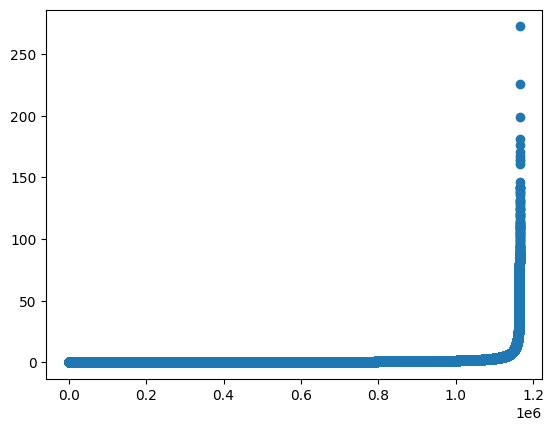

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


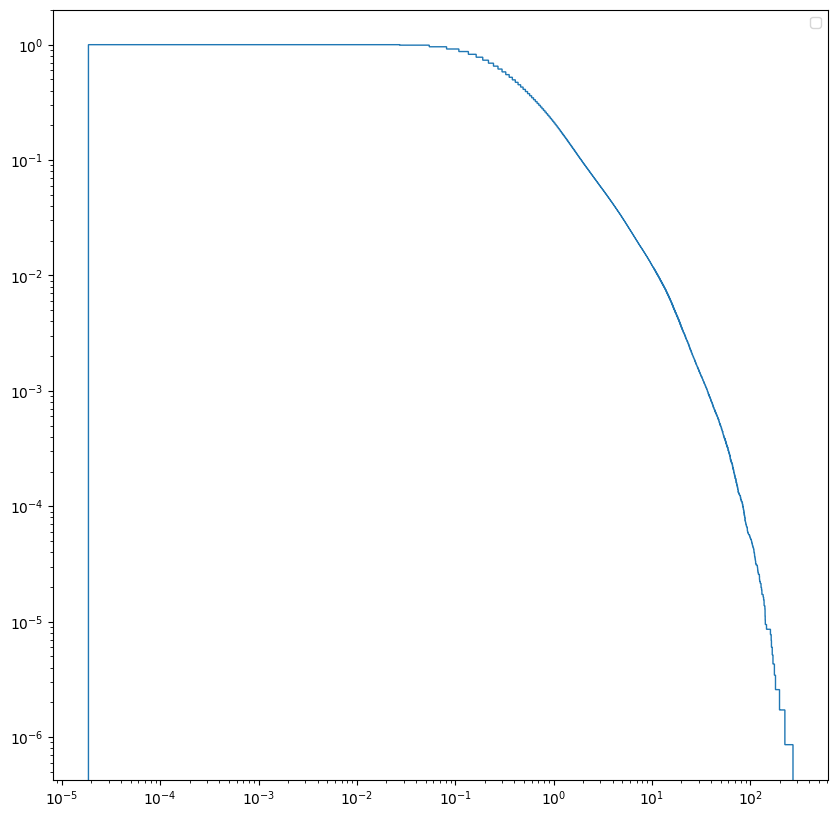

In [5]:
x = np.arange(0, len(sorted_vol), 1)
plt.scatter(x, sorted_vol)
plt.show()
# non-log plot
plt.figure(figsize=(10,10))
plt.hist(sorted_vol, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
plt.gca().set_xscale("log")
plt.legend()
plt.show()

In [6]:
vol_mean = np.mean(df_volume_clean.values.flatten())
df_vol_sum = df_volume_clean.sum().sum()
df_normalized_vol = df_volume_clean/vol_mean
sorted_vol = np.sort(df_normalized_vol.values.flatten())
sorted_vol = sorted_vol[np.where(sorted_vol != 0)]
print('start', sorted_vol[0:50])
print('end', sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

start [1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05]
end [108.74780037 109.12575949 109.33614318 109.60523425 110.4611006
 110.79132498 110.90836654 111.63211328 112.1796259  112.5636685
 113.12222841 113.65518548 113.69646353 115.06731645 118.15344766
 118.64773922 119.13785073 119

In [7]:
df_volume_clean.sum().sum()

6247448590788

### Velocity calculation

We do the velocity calculation on the real data a fashion similar as Feng et. al's 2012 paper, in the following steps:
1. Divide the total number of shares traded on the market(volume) by the number of outstanding shares of each stock every day
2. Resample the dataframe into a yearly timeframe
3. Sum up the yearly velocity per stock and divide it by the amount of years used in the dataframe which results in the mean velocity per stock
4. Take the mean of all the mean of the different stocks

In [8]:
# Step 1
velocity_df_daily = df_volume_clean_wrds/df_shares_outstanding_clean

# Step 2
velocity_yearly_df = velocity_df_daily.resample('Y').sum()

# Step 3 + 4
sum_velocity_yearly_df = velocity_yearly_df.apply(lambda x: x.sum())/velocity_yearly_df.shape[0] # .shape[0] = amount of rows 
V = sum_velocity_yearly_df.mean()

In [9]:
def probability_of_trading(V_f:float, V:float) -> float:
    """returns the probability of trading for a given velocity of fundamental traders and total market velocity V"""
    # V is total market velocity, V_f is the velocity of fundamental traders, V_c is the velocity of technical traders
    # We assume that the proportion of shares held by fundamental traders is the same as in the period 1997-2006, namely 83% on average. 
    # This might be a bit strong, but we continue with this assumption for now.
    # thus the velocity of technical traders is V_C is given by:
    V_c = (V - 0.83*V_f)/(1-0.83)
    # because there are around 250 trading days in a year, we arrive at probability of trading p as follows:
    p = V_c/(250*2)
    return p


In [10]:
# multiple choices of V_F, in the paper they chose V_f = 0.4 as an arbirtrary choice which achieved best fit
V_f_list = [0.2, 0.4, 0.6, 0.8]

print("The V value is", V)
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    print('V_f: ' + str(V_f), 'gives a p value of', p)


The V value is 2.1835498511136326
V_f: 0.2 gives a p value of 0.02373588060133685
V_f: 0.4 gives a p value of 0.02178293942486626
V_f: 0.6 gives a p value of 0.019829998248395674
V_f: 0.8 gives a p value of 0.017877057071925082


# Model parameters

In [11]:
# other parameters
n = 2**10
t = 10000
p = 0.02178
omega = 1
b = 1.5
size = 1
k = 1
M = 500
d = 1.12

# Model definition: ABM

In [12]:
# agent behaviors for buying, selling and holding based on the probability of trading p
def buy_sell_hold(p, amount_times):
    assert p <= 0.5, "p should be smaller than 0.5"
    psis = np.zeros(amount_times)
    dice_rolls = np.random.uniform(0, 1, amount_times)
    indices = np.nonzero(dice_rolls <= 2*p)
    for index in indices[0]:
        if np.random.randint(0,2) == 0:
            psis[index] = 1
        else:
            psis[index] = -1
    return psis

In [13]:
buy_sell_hold(0.2,10)

array([-1., -1.,  0.,  0., -1.,  1.,  1.,  0., -1., -1.])

In [14]:
# model fixed, by taking sqrt of b * mean and not rounding down intermediatly, and taking round instead of floor 

class Agent:
    def __init__(self, size) -> None:
        self.size = size


class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int, b: int) -> None:
        self.n = n
        self.p = p
        self.agents = [Agent(size) for i in range(n)]
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0
        self.b = b

        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:
        if self.b == 0:
            
            # number of opinion groups
            if sum(self.daily_return) != 0:
                c = (self.n / abs(sum(self.daily_return))) ** self.omega
            else:
                c = self.n

             # rounding down c to the nearest integer
            c = round(c)
            
        
            opinion_groups = [[] for i in range(c)]
            opinion_agents = self.agents.copy()

            # distribute agents evenly
            for opinion_group in opinion_groups:
                for i in range(round(self.n / c)):
                    if len(opinion_agents) > 0:
                        i = rnd.choice([i for i in range(len(opinion_agents))])

                        opinion_group.append(opinion_agents[i])
                        del opinion_agents[i]
                    else:
                        break
        
        else:
            if sum(self.daily_return) != 0:
                mean = (self.n / abs(sum(self.daily_return))) ** self.omega
            else:
                mean = self.n
                
            
            c = np.random.normal(loc = mean, scale = np.sqrt(mean * self.b))
             # rounding down c to the nearest integer
            c = math.floor(c)

            opinion_groups = [[] for i in range(round(c))]
            opinion_agents = self.agents.copy()

            # distribute agents evenly
            for opinion_group in opinion_groups:
                for i in range(round(self.n / c)):
                    if len(opinion_agents) > 0:
                        i = rnd.choice([i for i in range(len(opinion_agents))])

                        opinion_group.append(opinion_agents[i])
                        del opinion_agents[i]
                    else:
                        break            
                
        return opinion_groups

    def step(self):
        self.count += 1
        opinion_groups = self.distribute_opinion_groups()
        self.daily_return = []
        self.trading_volume = 0

        for opinion_group in opinion_groups:
            psi = buy_sell_hold(self.p)
            self.daily_return.append(psi * len(opinion_group))
            self.trading_volume += abs(psi * len(opinion_group))
    
        self.daily_returns.append(sum(self.daily_return) * k)
        self.daily_trading_volumes.append(self.trading_volume)

        return self.count

In [15]:
# ABM model integer version (instead agent version where agents are appending agent object to the opinion group)

class Model:
    def __init__(self, p: float, n: int, size: int, b:float, k: int, omega: int) -> None:
        self.n = n
        self.p = p
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0
        self.b = b
        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:
        if self.b == 0:
            # number of opinion groups
            if sum(self.daily_return) != 0:
                c = (self.n / abs(sum(self.daily_return))) ** self.omega
            else:
                c = self.n


        else:
            if sum(self.daily_return) != 0:
                mean = (self.n / abs(sum(self.daily_return))) ** self.omega
            else:
                mean = self.n

            c = np.random.normal(loc = mean, scale = np.sqrt(mean * self.b))

        # rounding down c to the nearest integer
        c = math.floor(c)
            
        self.c = c
                
        return c

    def step(self):
        self.count += 1
        c = int(self.distribute_opinion_groups())
        psis = buy_sell_hold(self.p, c) 
        agents_per_group = self.n / c
        daily_return = psis * agents_per_group
        trading_volume = np.sum(np.abs(daily_return))
        self.daily_returns.append(np.sum(daily_return * self.k))
        self.daily_trading_volumes.append(trading_volume)
        return self.count

# ABM test run

In [16]:
# ABM simulation
model_test = Model(p, n, size, k, omega, b)
for i in range(t):
    model_test.step()


(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   0.,   2.,
          1.,   3.,   3.,   3.,   5.,   2.,   5.,   8.,   5.,   9.,  14.,
         13.,  14.,  20.,  25.,  26.,  37.,  38.,  50.,  64.,  72.,  75.,
         85., 116.,  92., 144., 114., 169., 166., 192., 228., 177., 367.,
         80., 523.,  13., 562.,   9., 498.,  20., 578., 647.,   0., 610.,
          0., 556.,   2., 550.,  26., 472.,  97., 339., 175., 245., 190.,
        138., 198., 105., 163.,  99., 130.,  84.,  77.,  87.,  56.,  58.,
         49.,  35.,  26.,  32.,  21.,  17.,  15.,  12.,  11.,   9.,   9.,
          7.,   6.,   0.,   3.,   3.,   1.,   2.,   1.,   2.,   1.,   0.,
          1.]),
 array([-2.86834734e+01, -2.81419651e+01, -2.76004568e+01, -2.70589485e+01,
        -2.65174402e+01, -2.59759318e+01, -2.54344235e+01, -2.48929152e+01,
        -2.43514069e+01, -2.38098986e+01, -2.32683903e+01, -2.27268820e+01,
        -2.21853737e+01, -2.16438654e+01, -2.11023571e+01, -2.05608488e+01,
        -2.001

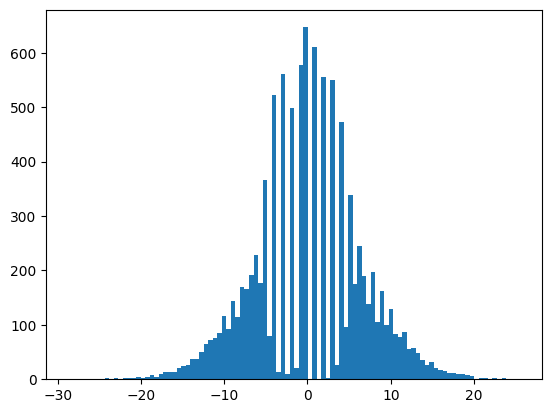

In [17]:
plt.hist(model_test.daily_returns, bins = 100)

In [18]:
# Nitai's variabe transformations:
# converting data to array, taking asolute value, and normalizing with standard scaler to zero mean and unit variance, using sklearn StandardScaler. reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
array_AMB_returns = np.array(model_test.daily_returns)
abs_AMB_returns = np.abs(array_AMB_returns)
# checking if abs transformation worked
assert abs_AMB_returns.min() == 0
scaler = StandardScaler()
scaled_abs_ABM_returns = scaler.fit_transform(abs_AMB_returns.reshape(-1, 1))
# checking if standard scaling worked
assert abs_AMB_returns.max() > scaled_abs_ABM_returns.max()

In [19]:
log_scaled_abs_AMB_returns = np.log(scaled_abs_ABM_returns)

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27896\1685117646.py:1: RuntimeWarning:

invalid value encountered in log



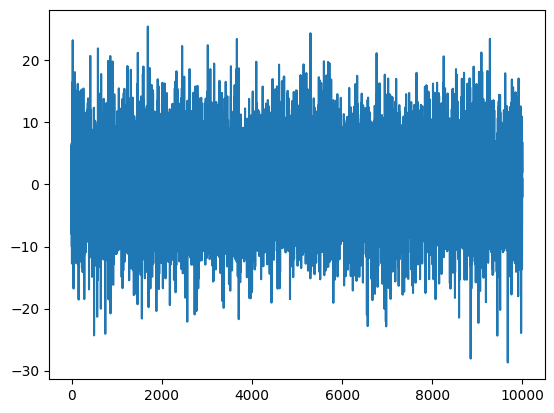

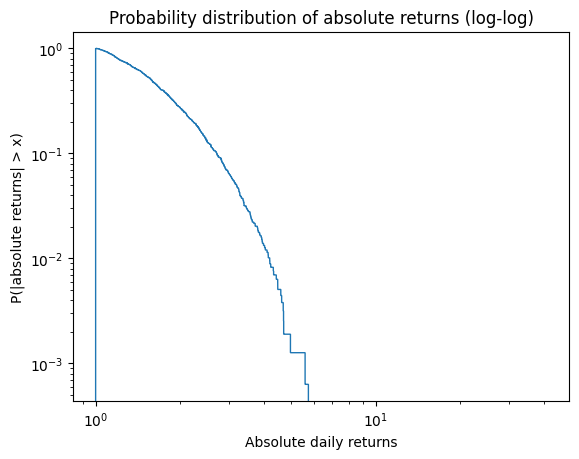

In [20]:
# logarithmic bins
bin=np.logspace(start=0, stop=np.log(5), num=t)

#Yonas' code: normalising returns
# returns = [(abs(day) - np.mean(model_test.daily_returns)) / np.std(model_test.daily_returns) for day in model_test.daily_returns]

# Nitai's code: normalised returns
returns = scaled_abs_ABM_returns


plt.plot(model_test.daily_returns)
plt.show()

plt.figure(1)
plt.hist(returns, bin, cumulative=-1, density=True, log=True, histtype='step')
plt.title("Probability distribution of absolute returns (log-log)")
plt.xlabel("Absolute daily returns")
plt.ylabel("P(|absolute returns| > x)")
plt.gca().set_xscale("log")
plt.show()


# Model definition: Stochastic model

In [21]:
class Stochastic_Model:
    def __init__(self, n: int, p: float, init: int, time_horizon: bool, M, d):
        self.returns = [init]
        self.n = n
        self.p = p
        self.time_horizon = time_horizon
        self.M = M
        self.d = d

    def time_horizons(self):
        time_horizons = []
        alpha = []

        # distribution of agents in different time horizons
        # agents are allocated to each time horizon (with exponential decay as we go back in time), until we reach the limit M
        # or until we reach the beginning of the simulation (if current timestep t < M)
        for i in range(1, self.M + 1):
            if len(self.returns) == 1:
                value = (i ** -self.d) * abs(self.returns[-1])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

            elif i >= len(self.returns):
                value = (i ** -self.d) * abs(self.returns[-1] - self.returns[0])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

            else:
                value = (i ** -self.d) * abs(self.returns[-1] - self.returns[-1-i])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

        return sum(time_horizons) * (sum(alpha) ** -1)

    def step(self):

        # Agents only factor in the returns at the previous timestep
        if self.time_horizon == False:
            variance  = 2 * p * n * abs(self.returns[-1])
            std = math.sqrt(variance)
            value = std * np.random.normal(0.0, 1.0)
            self.returns.append(value)
        
        # Agents look back M timesteps
        if self.time_horizon == True:
            horizons = self.time_horizons()
            variance  = 2 * p * n * horizons
            std = math.sqrt(variance)
            value = std * np.random.normal(0.0, 1.0)
            self.returns.append(value)  

# Stochastic model test run

In [22]:
# Stochastic simulation

stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)

for i in range(t):
    stochastic.step()
    stochastic_horizons.step()

In [23]:
# Nitai's variabe transformations:
# changing datatype to array
stochastic_returns_array = np.array(stochastic.returns)
stochastic_returns_horizons_array = np.array(stochastic_horizons.returns)
# taking absolute value
stochastic_returns_abs = np.abs(stochastic_returns_array)
stochastic_returns_horizons_abs = np.abs(stochastic_returns_horizons_array)
# normalizing with standard scaler
scaler = StandardScaler()
scaled_stochastic_returns = scaler.fit_transform(stochastic_returns_abs.reshape(-1, 1))
scaled_stochastic_returns_horizons = scaler.fit_transform(stochastic_returns_horizons_abs.reshape(-1, 1))


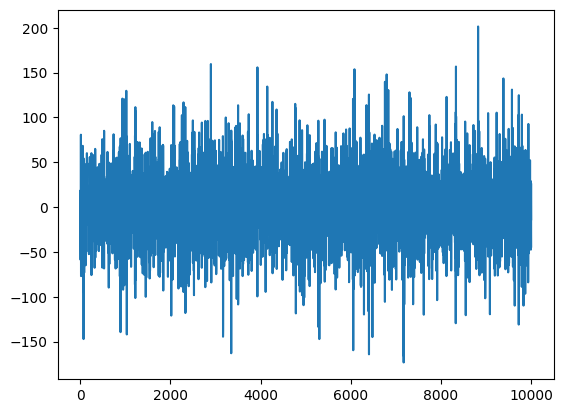

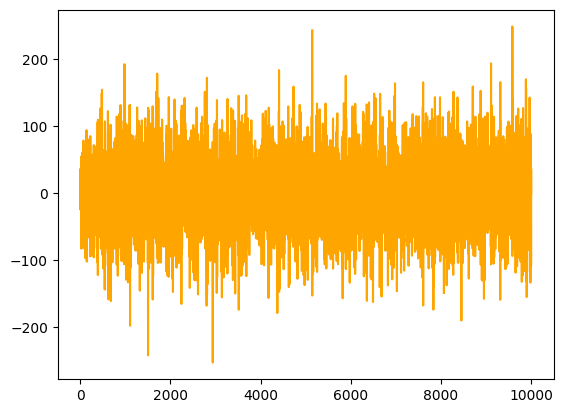

(199,)


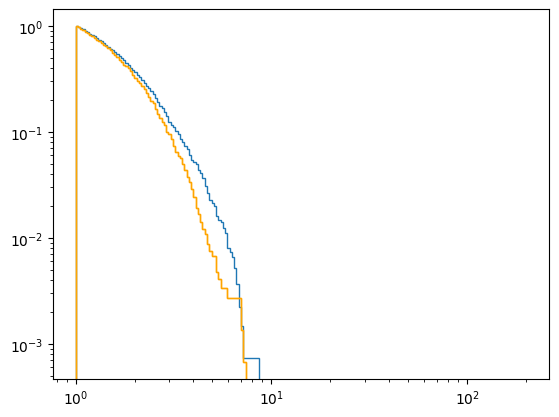

In [24]:
#stochastic simulation return plots
plt.plot(range(t + 1), stochastic.returns)
plt.show()

plt.plot(range(t+1), stochastic_horizons.returns, color='orange')
plt.show()

# Yona's code: normalizing returns
# abs_returns = [(abs(i) - np.mean(stochastic.returns)) / (np.std(stochastic.returns)) for i in stochastic.returns]
# abs_returns_horizons = [(abs(i) - np.mean(abs_returns)) / (np.std(stochastic.returns)) for i in stochastic_horizons.returns]

# Nitai's code: returns normalized previously
abs_returns = scaled_stochastic_returns
abs_returns_horizons = scaled_stochastic_returns_horizons


bin=np.logspace(start=0, stop=np.log(10), num=200)

plt.hist(abs_returns, bins=bin, cumulative=-1, density=True, log=True, histtype='step')
plt.hist(abs_returns_horizons, bin, cumulative=-1, density=True, log=True, histtype='step', color = 'orange')
bins_heights = plt.hist(abs_returns_horizons, bin, cumulative=-1, density=True, log=True, histtype='step', color = 'orange')[0]
print(bins_heights.shape)
plt.gca().set_xscale("log")
plt.show()

# Simulation functions

In [25]:
# (self, n: int, p: float, init: int, time_horizon: bool, M, d)

In [35]:
def run_ABM(p, n, size, k, omega, b, t, runs):
    ''' Runs the ABM model for a given number of runs and time steps. Returns a list of lists of daily returns and a list of lists of trading volume.'''
    ABM_sim_results_returns = []
    ABM_sim_results_volume = []
    for run in range(runs):
        model = Model(p, n, size, k, omega, b)
        for i in range(t):
            model.step()
        ABM_sim_results_returns.append(model.daily_returns)
        ABM_sim_results_volume.append(model.daily_trading_volumes)    
    ABM_sim_results_returns_array = np.array(ABM_sim_results_returns)
    ABM_sim_results_volume_array = np.array(ABM_sim_results_volume)
    return ABM_sim_results_returns_array, ABM_sim_results_volume_array
        

In [309]:
def run_Stochastic_Model(n: int, p: float, init: int, time_horizon: bool, M, d, t, runs):
    ''' Runs the stochastic model for a given number of runs and time steps, outputs a list of lists of daily returns and a list of lists of trading volume.'''
    Stochastic_Model_sim_results_returns = []
    Stochastic_Model_sim_results_volume = []
    for run in range(runs):
        model = Stochastic_Model(n=n, p=p, init=10, time_horizon=time_horizon, M=M, d=d)
        # model = Stochastic_Model(n, p, init, time_horizon, M, d)
        for i in range(t):
            model.step()
        Stochastic_Model_sim_results_returns.append(model.returns)
    Stochastic_Model_sim_results_return_array = np.array(Stochastic_Model_sim_results_returns)
    return Stochastic_Model_sim_results_return_array

# Hill estimator function

In [62]:
# The following Hill estimator coded according description in https://cran.r-project.org/web/packages/ptsuite/vignettes/ptsuite_vignette.pdf
def Hill_estimator(data, tail_percentage):
    """
    Returns the Hill Estimators for some 1D data set.
    """  
    # sort data in such way that the smallest value is first and the largest value comes last:
    Y = np.sort(data)
    n = len(Y)
    k = int(np.round((tail_percentage * n)/100))
    log_x_n_minus_k = np.log(Y[n-k-1])
    log_x_n_minus_j_plus_1 = np.log(Y[-k:])

    alpha_est = k *(np.sum(log_x_n_minus_j_plus_1 - log_x_n_minus_k))**(-1)

    return alpha_est

# Running multiple ABM simulation runs:

### Parameters:

In [28]:
V_f_list = [0.2, 0.4, 0.6, 0.8]

print("The V value is", V)
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    print('V_f: ' + str(V_f), 'gives a p value of', p)

The V value is 2.1835498511136326
V_f: 0.2 gives a p value of 0.02373588060133685
V_f: 0.4 gives a p value of 0.02178293942486626
V_f: 0.6 gives a p value of 0.019829998248395674
V_f: 0.8 gives a p value of 0.017877057071925082


In [36]:
# other parameters
n = 2**10
t = 10**6
p = 0.02178
omega = 1
b = 1.0
size = 1
k = 1
M = 500
d = 1.12
runs = 10

In [37]:
n0_list = [2**8, 2**10, 2**12, 2**14]
V_f_list = [0.2, 0.4, 0.6, 0.8]

In [ ]:
# ABM returns for different V_f's (so in effect different p) across 10 runs

# ABM returns for different omega's across 10 runs

In [ ]:
# other parameters
n = 2**10
t = 10**6
p = 0.02178
omega = 1
b = 1.0
size = 1
k = 1
runs = 10

In [ ]:
# same omega list as in the paper: Feng et al. 2012
omega_list = [0.5, 0.6,	0.7, 0.8, 0.9, 1.0,	1.1, 1.2, 1.4, 1.5, 2.0]

In [ ]:
# 10 runs, for different values of omega , using Vf = 0.4, n0 = 2**10, b = 1.0
results_ABM_10_runs_for_different_omega = []
for omega in omega_list:
    run_results = run_ABM(p, n, size, k, omega, b, t, runs)
    results_ABM_10_runs_for_different_omega.append(run_results)

In [ ]:
bins = np.logspace(-4,3, 100)
for omega in range(len(omega_list = [0.5, 0.6,	0.7, 0.8, 0.9, 1.0,	1.1, 1.2, 1.4, 1.5, 2.0])):
    for run in range(10):
        plt.hist(results_ABM_10_runs_for_different_omega[omega][0][run].flatten(), bins=bins, alpha=0.5, cumulative=-1, log = True, histtype='step',label='V_f = ' + str(run),density=1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of returns V_f: {str(omega_list[omega])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [ ]:
dict_of_results_for_different_omega = {}
for omega in range(len(omega_list)):
    HE_list_omega = []
    for run in range(10):
        HE_list_omega.append(Hill_estimator(results_ABM_10_runs_for_different_omega[omega][0][run].flatten(),1))
    dict_of_results_for_different_omega[omega_list[omega]] = np.mean(HE_list_omega), np.min(HE_list_omega), np.max(HE_list_omega)

In [ ]:
# making a dataframe with the mean, min and max of the Hill estimator for different values of V_f
df_ABM_return_results_for_different_omega = pd.DataFrame(dict_of_results_for_different_omega)
df_ABM_return_results_for_different_omega.index = [ 'mean', 'min', 'max']
df_ABM_return_results_for_different_omega 

In [ ]:
# saving the dataframe as a csv file
df_ABM_return_results_for_different_omega.to_csv('df_ABM_return_results_for_different_omega.csv')

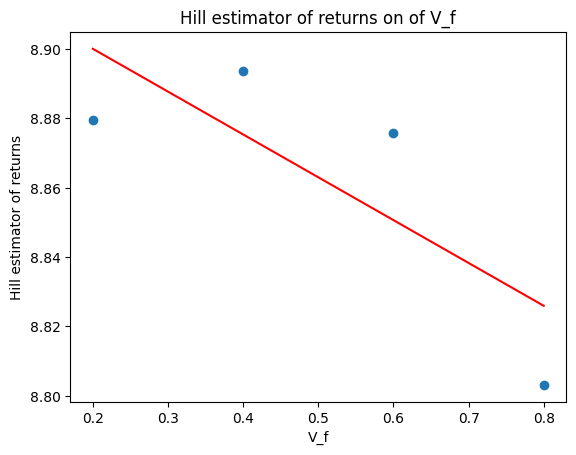

R^2: 0.616461212668425)
intercept: 8.924733224083981
coefficient: [-0.12347702]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.031133416614248594
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [ ]:
# regress the Hill estimator of returns on omega
X = np.array(omega_list).reshape(-1,1)
y = df_ABM_return_results_for_different_omega.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on omega')
plt.xlabel('V_f')
plt.ylabel('Hill estimator of returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

# ABM returns for different V_f's (so in effect different p) across 10 runs



In [38]:
# 10 runs, for different values of V_f , using n0 = 2**10
n0 = 2**10
results_ABM_10_runs_for_different_V_f = []
for V_f in V_f_list:
    print(p)
    p = probability_of_trading(V_f, V)
    run_results = run_ABM(p, n, size, k, omega, b, t, runs)
    results_ABM_10_runs_for_different_V_f.append(run_results)

0.02178
0.02373588060133685
0.02178293942486626
0.019829998248395674


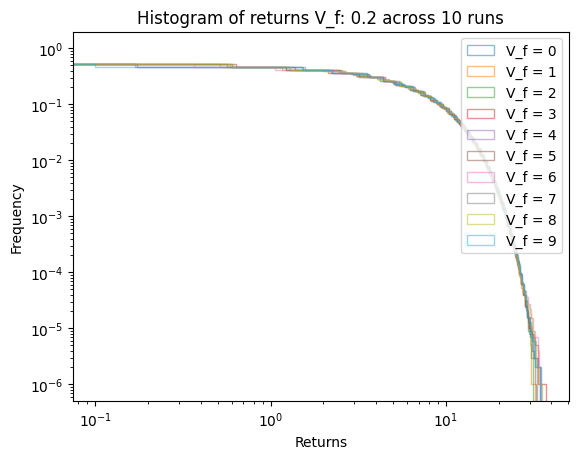

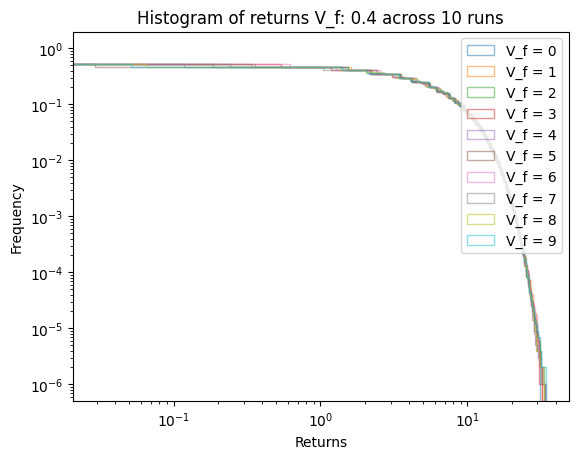

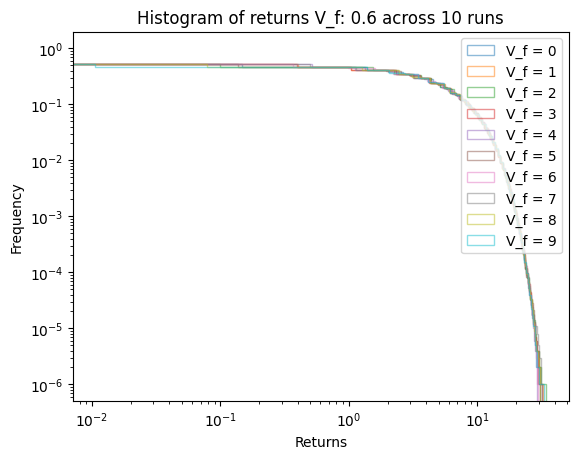

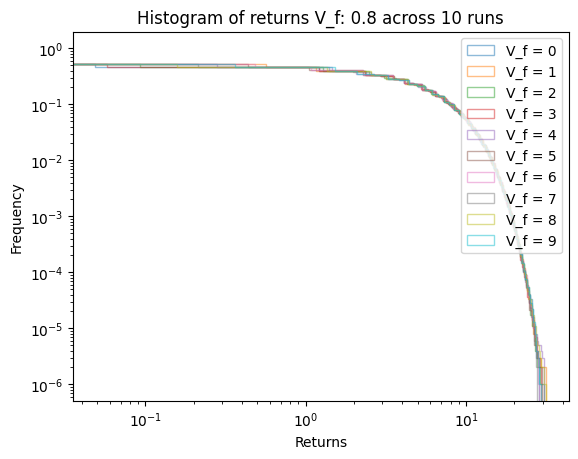

In [219]:
# plot all runs for different values of V_f on hitograms
bins = np.logspace(-4,3, 100)
for V_f in range(len(V_f_list)):
    for run in range(10):
        plt.hist(results_ABM_10_runs_for_different_V_f[V_f][0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label='V_f = ' + str(run),density=1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of returns V_f: {str(V_f_list[V_f])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [71]:
# making a dictionary with the mean, min and max of the Hill estimator of distribution of returns for different values of V_f
dict_of_results_for_different_V_f = {}
for V_f in range(len(V_f_list)):
    HE_list_V_f = []
    for run in range(10):
        HE_list_V_f.append(Hill_estimator(results_ABM_10_runs_for_different_V_f[V_f][0][run].flatten(),1))
    dict_of_results_for_different_V_f[V_f_list[V_f]] = np.mean(HE_list_V_f), np.min(HE_list_V_f), np.max(HE_list_V_f)

In [72]:
dict_of_results_for_different_V_f

{0.2: (7.5932306749072, 7.513452684682393, 7.784704918534068),
 0.4: (7.63234108822221, 7.501697579792414, 7.7187557277916685),
 0.6: (7.662683759724284, 7.532257119945709, 7.786600912176449),
 0.8: (7.573244970644569, 7.499324196425309, 7.724042612804194)}

In [73]:
# making a dataframe with the mean, min and max of the Hill estimator of distribution of returns for different values of V_f
df_ABM_results_for_different_V_F = pd.DataFrame(dict_of_results_for_different_V_f)
df_ABM_results_for_different_V_F.index = [ 'mean', 'min', 'max']
df_ABM_results_for_different_V_F 

,0.2,0.4,0.6,0.8
mean,7.593231,7.632341,7.662684,7.573245
min,7.513453,7.501698,7.532257,7.499324
max,7.784705,7.718756,7.786601,7.724043


In [74]:
# saving the dataframe as a csv file
df_ABM_results_for_different_V_F.to_csv('df_ABM_results_for_different_V_F.csv')

In [ ]:
dict_of_results_for_different_V_f

{0.2: (7.5932306749072, 7.513452684682393, 7.784704918534068),
 0.4: (7.63234108822221, 7.501697579792414, 7.7187557277916685),
 0.6: (7.662683759724284, 7.532257119945709, 7.786600912176449),
 0.8: (7.573244970644569, 7.499324196425309, 7.724042612804194)}

In [198]:
# making a dataframe with the mean, min and max of the Hill estimator for different values of V_f
df_ABM_return_results_for_different_V_F = pd.DataFrame(dict_of_results_for_different_V_f)
df_ABM_return_results_for_different_V_F.index = [ 'mean', 'min', 'max']
df_ABM_return_results_for_different_V_F 

,0.2,0.4,0.6,0.8
mean,8.879557,8.893530,8.875713,8.803178
min,8.796200,8.818582,8.786966,8.749005
max,9.019767,8.952492,8.991800,8.896983


In [199]:
# saving the dataframe as a csv file
df_ABM_return_results_for_different_V_F.to_csv('df_ABM_results_for_different_V_F.csv')

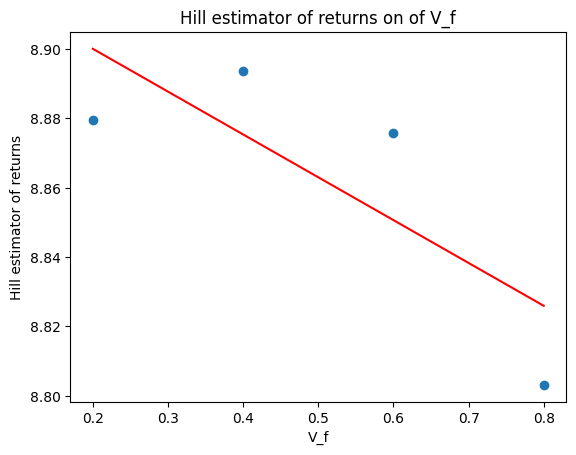

R^2: 0.616461212668425)
intercept: 8.924733224083981
coefficient: [-0.12347702]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.031133416614248594
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [200]:
# regress the Hill estimator of returns on V_f
X = np.array(V_f_list).reshape(-1,1)
y = df_ABM_return_results_for_different_V_F.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on of V_f')
plt.xlabel('V_f')
plt.ylabel('Hill estimator of returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

# ABM abs returns for each run for different V_f's

In [83]:
# taking abs returns for each run (different V_f)
abs_returns_ABM_results_for_different_V_f = []
for V_f in range(len(V_f_list)):
    abs_returns_ABM_results_for_single_V_f = []
    for run in range(10):
        abs_returns_ABM_results_for_single_V_f.append(np.abs(results_ABM_10_runs_for_different_V_f[V_f][0][run]))
    abs_returns_ABM_results_for_different_V_f.append(abs_returns_ABM_results_for_single_V_f)
    

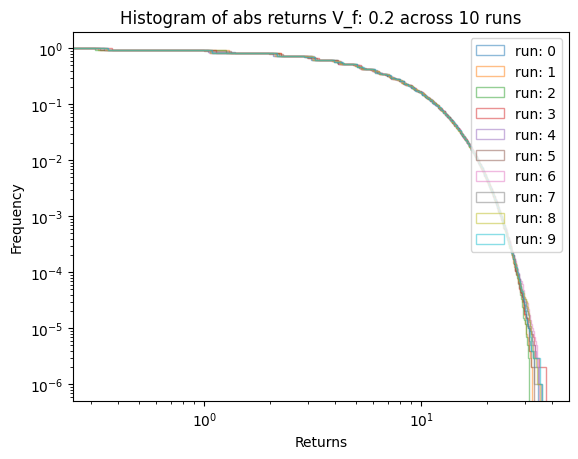

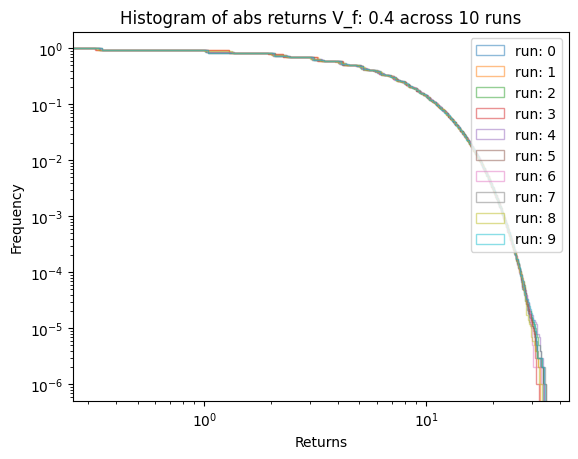

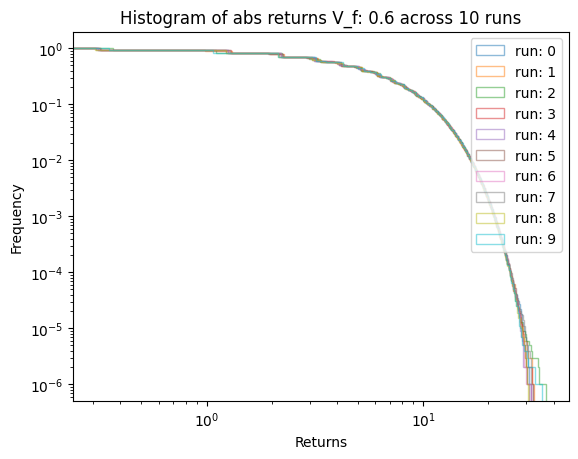

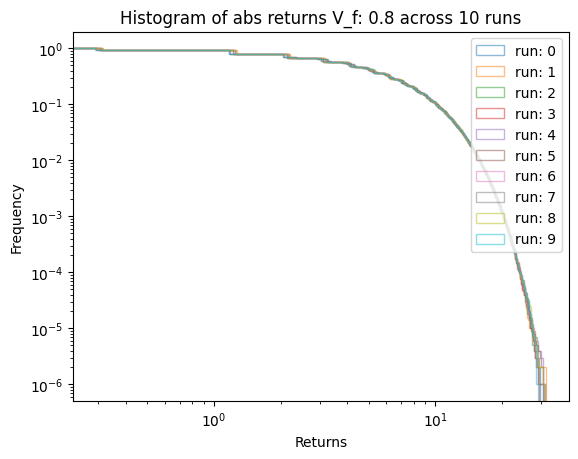

In [316]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for V_f in range(len(V_f_list)):
    for run in range(10):
        plt.hist(abs_returns_ABM_results_for_different_V_f[V_f][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label='run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of abs returns V_f: {str(V_f_list[V_f])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [89]:
# making a dictionary with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
dict_of_results_for_different_V_f = {}
for V_f in range(len(V_f_list)):
    HE_list_V_f = []
    for run in range(10):
        HE_list_V_f.append(Hill_estimator(abs_returns_ABM_results_for_different_V_f[V_f][run].flatten(),1))
    dict_of_results_for_different_V_f[V_f_list[V_f]] = np.mean(HE_list_V_f), np.min(HE_list_V_f), np.max(HE_list_V_f)

In [90]:
dict_of_results_for_different_V_f

{0.2: (8.8795574023904, 8.796200265746442, 9.019767205448597),
 0.4: (8.8935299709979, 8.818581757702797, 8.952492141566895),
 0.6: (8.875713148898415, 8.786965949222198, 8.991799613115829),
 0.8: (8.803178327610734, 8.74900463645955, 8.896983395818758)}

In [92]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
df_ABM_abs_return_results_for_different_V_F = pd.DataFrame(dict_of_results_for_different_V_f)
df_ABM_abs_return_results_for_different_V_F.index = [ 'mean', 'min', 'max']
df_ABM_abs_return_results_for_different_V_F

,0.2,0.4,0.6,0.8
mean,8.879557,8.893530,8.875713,8.803178
min,8.796200,8.818582,8.786966,8.749005
max,9.019767,8.952492,8.991800,8.896983


In [ ]:
# saving the dataframe as a csv file
df_ABM_abs_return_results_for_different_V_F.to_csv('df_ABM_results_for_different_V_F.csv')


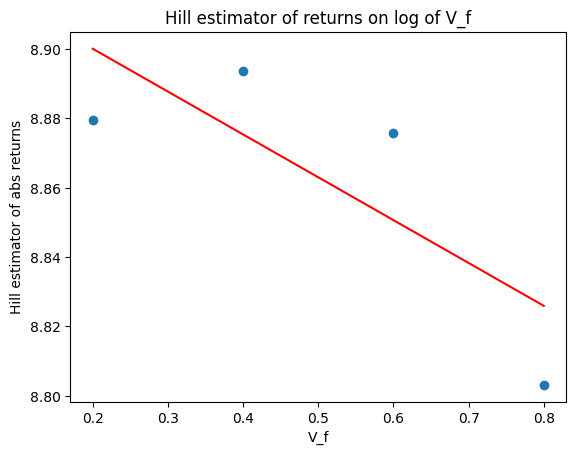

R^2: 0.616461212668425)
intercept: 8.924733224083981
coefficient: [-0.12347702]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.031133416614248594
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [193]:
# regress the Hill estimator of abs returns on log V_f
X = np.array(V_f_list).reshape(-1,1)
y = df_ABM_abs_return_results_for_different_V_F.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on log of V_f')
plt.xlabel('V_f')
plt.ylabel('Hill estimator of abs returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')
    

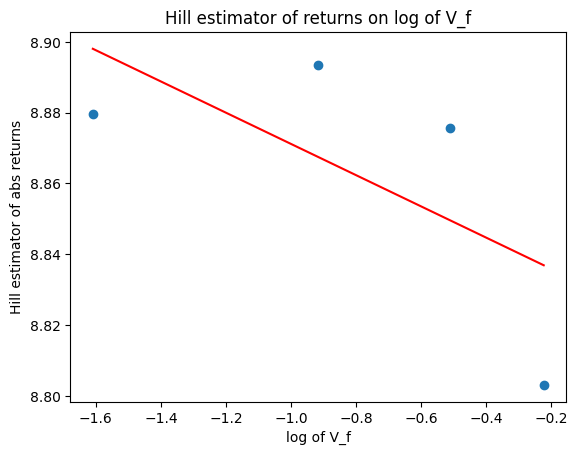

R^2: 0.425770229492498)
intercept: 8.82707795973572
coefficient: [-0.04407372]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.07214512825216268
Thus, we fail to reject the null hypothesis


In [196]:
# regress the Hill estimator of abs returns on log V_f
X = np.log((np.array(V_f_list))).reshape(-1,1)
y = df_ABM_abs_return_results_for_different_V_F.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on log of V_f')
plt.xlabel('log of V_f')
plt.ylabel('Hill estimator of abs returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')
    


Kind of looks like a polynomial

# ABM return results for different n0

In [41]:
# 10 runs, for different values of n0 (number of agents), using V_f = 0.4
results_ABM_10_runs_for_different_n0 = []
p = probability_of_trading(0.4, V)
for n0 in n0_list:
    print(n0)
    results_ABM_10_runs_for_different_n0.append(run_ABM(p, n0, size, k, omega, b, t, runs))

256
1024
4096
16384


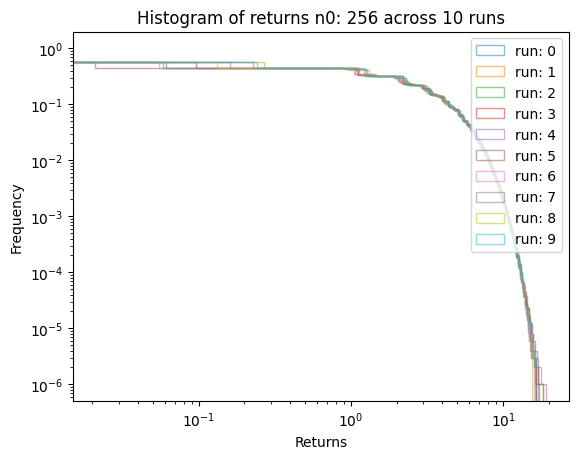

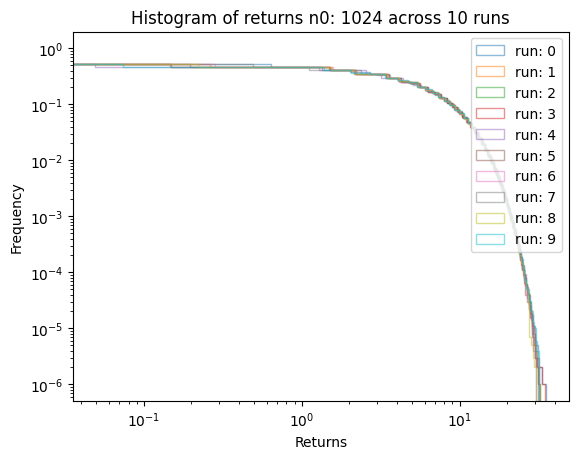

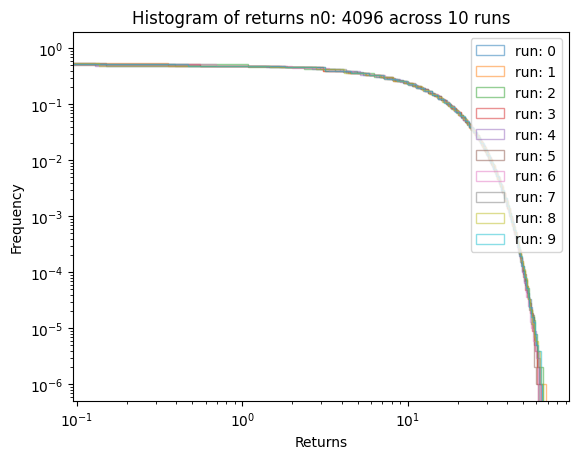

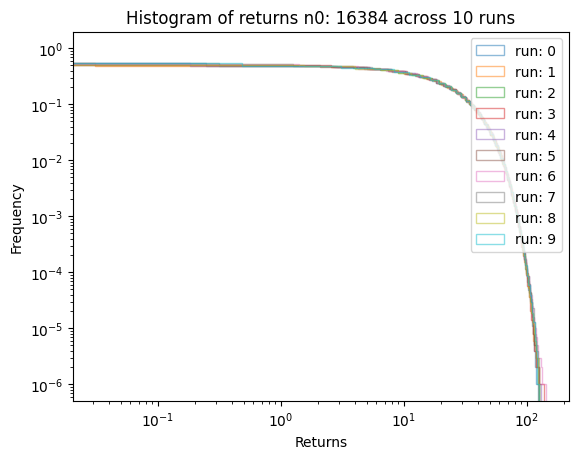

In [318]:
# plot all runs for different values of V_f on hitograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(results_ABM_10_runs_for_different_n0[n0][0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of returns n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [68]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(results_ABM_10_runs_for_different_n0[n0][0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [57]:
dict_of_results_for_different_n0

{256: (7.4089185487532365, 7.255699840396663, 7.506359441612158),
 1024: (7.6153960491684405, 7.5340848176661, 7.707302132202081),
 4096: (7.708853779951499, 7.609146810043501, 7.855715352783609),
 16384: (7.7012952569647535, 7.647734363631352, 7.845724075160902)}

In [60]:
df_ABM_results_for_different_n0 = pd.DataFrame(dict_of_results_for_different_n0)
df_ABM_results_for_different_n0.index = [ 'mean', 'min', 'max']
df_ABM_results_for_different_n0

,256,1024,4096,16384
mean,7.408919,7.615396,7.708854,7.701295
min,7.255700,7.534085,7.609147,7.647734
max,7.506359,7.707302,7.855715,7.845724


In [61]:
df_ABM_results_for_different_n0.to_csv('df_ABM_results_for_different_n0.csv')

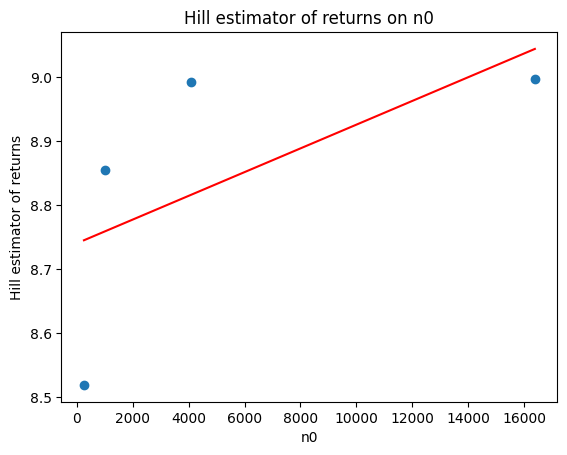

R^2: 0.38131824009348747)
intercept: 8.740058239731152
coefficient: [1.85530058e-05]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.23194867750391865
Thus, we do reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [160]:
# regress the Hill estimator of returns on of n0
X = (np.array(n0_list)).reshape(-1,1)
y = df_ABM_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on n0')
plt.xlabel('n0')
plt.ylabel('Hill estimator of returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')
    

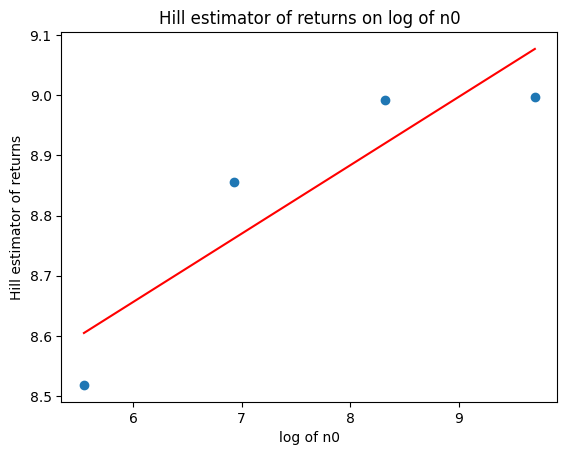

R^2: 0.8168551819869996)
intercept: 7.9753934643603
coefficient: [0.11352608]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.0024956632999350347
Thus, we reject the null hypothesis in favor of the alternative hypothesis


In [158]:
# regress the Hill estimator of returns on log of n0
X = np.log((np.array(n0_list))).reshape(-1,1)
y = df_ABM_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of returns on log of n0')
plt.xlabel('log of n0')
plt.ylabel('Hill estimator of returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')
    


# ABM abs return results for different values of n0

In [116]:
# taking abs returns for each run (different n0)
abs_returns_ABM_results_for_different_n0 = []
for n0 in range(len(n0_list)):
    abs_returns_ABM_results_for_same_n0 = []
    for run in range(10):
        abs_returns_ABM_results_for_same_n0.append(np.abs(results_ABM_10_runs_for_different_n0[n0][0][run]))
    abs_returns_ABM_results_for_different_n0.append(abs_returns_ABM_results_for_same_n0)
    

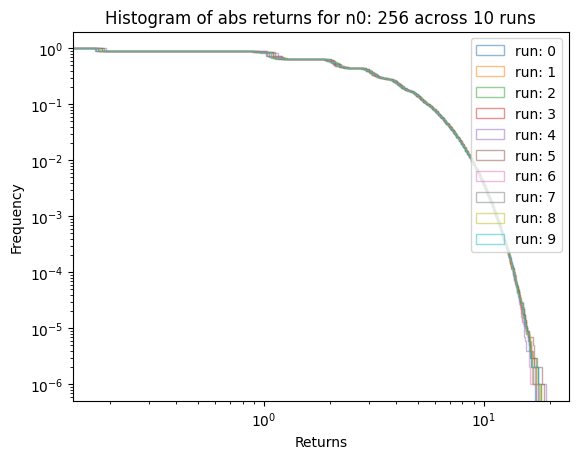

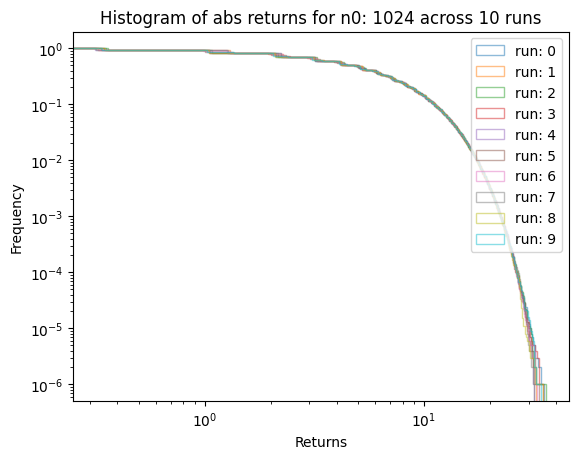

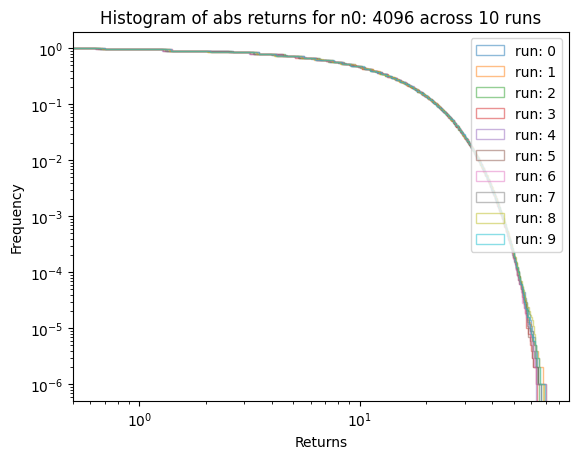

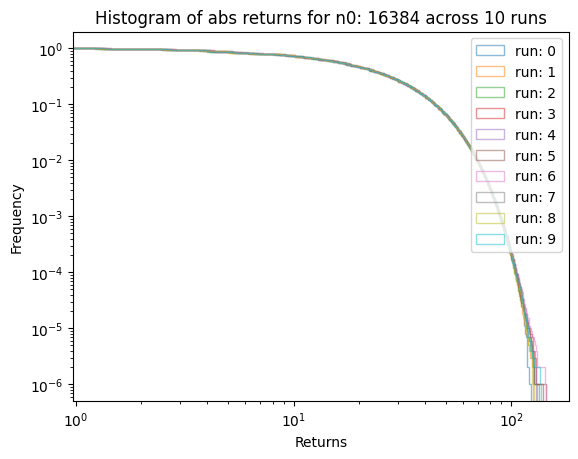

In [319]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(abs_returns_ABM_results_for_different_n0[n0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of abs returns for n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [122]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(abs_returns_ABM_results_for_different_n0[n0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [123]:
dict_of_results_for_different_n0

{256: (8.518612867078602, 8.29822261503624, 8.64439117283007),
 1024: (8.855233659648263, 8.701174351261647, 8.958356835480481),
 4096: (8.992710785846628, 8.860216115921798, 9.099479023560367),
 16384: (8.997389053609762, 8.93998701657125, 9.091649951102454)}

In [125]:
df_ABM_results_for_different_n0_abs_returns = pd.DataFrame(dict_of_results_for_different_n0)
df_ABM_results_for_different_n0_abs_returns.index = [ 'mean', 'min', 'max']
df_ABM_results_for_different_n0_abs_returns

,256,1024,4096,16384
mean,8.518613,8.855234,8.992711,8.997389
min,8.298223,8.701174,8.860216,8.939987
max,8.644391,8.958357,9.099479,9.091650


In [126]:
df_ABM_results_for_different_n0_abs_returns.to_csv('df_ABM_results_for_different_n0_abs_returns.csv')

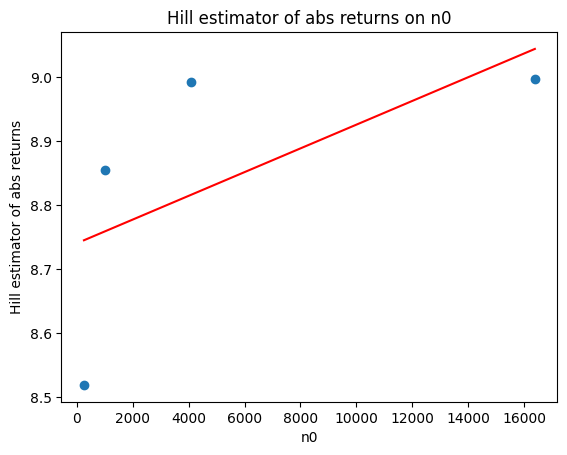

R^2: 0.38131824009348747)
intercept: 8.740058239731152
coefficient: [1.85530058e-05]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.23194867750391865
Thus, we fail to reject the null hypothesis


In [201]:
# regress the Hill estimator of abs returns on of n0
X = (np.array(n0_list)).reshape(-1,1)
y = df_ABM_results_for_different_n0_abs_returns.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of abs returns on n0')
plt.xlabel('n0')
plt.ylabel('Hill estimator of abs returns')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

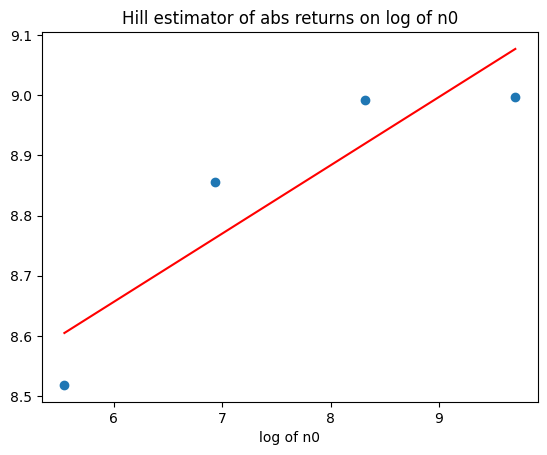

R^2: 0.8168551819869996)
intercept: 7.9753934643603
coefficient: [0.11352608]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.0024956632999350347
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [202]:
# regress the Hill estimator of abs returns on log of n0
X = np.log(np.array(n0_list)).reshape(-1,1)
y = df_ABM_results_for_different_n0_abs_returns.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of abs returns on n0')
plt.title('Hill estimator of abs returns on log of n0')
plt.xlabel('log of n0')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')


In [ ]:
# making a dictionary with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
dict_of_results_for_different_n0 = {}
for n0 in range(len(V_f_list)):
    HE_list_V_f = []
    for run in range(10):
        HE_list_V_f.append(Hill_estimator(abs_returns_ABM_results_for_different_V_f[V_f][run].flatten(),1))
    dict_of_results_for_different_V_f[V_f_list[V_f]] = np.mean(HE_list_V_f), np.min(HE_list_V_f), np.max(HE_list_V_f)

In [ ]:
dict_of_results_for_different_V_f

{0.2: (8.8795574023904, 8.796200265746442, 9.019767205448597),
 0.4: (8.8935299709979, 8.818581757702797, 8.952492141566895),
 0.6: (8.875713148898415, 8.786965949222198, 8.991799613115829),
 0.8: (8.803178327610734, 8.74900463645955, 8.896983395818758)}

In [ ]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
df_ABM_abs_return_results_for_different_V_F = pd.DataFrame(dict_of_results_for_different_V_f)
df_ABM_abs_return_results_for_different_V_F.index = [ 'mean', 'min', 'max']
df_ABM_abs_return_results_for_different_V_F

,0.2,0.4,0.6,0.8
mean,8.879557,8.893530,8.875713,8.803178
min,8.796200,8.818582,8.786966,8.749005
max,9.019767,8.952492,8.991800,8.896983


In [ ]:
# saving the dataframe as a csv file
df_ABM_abs_return_results_for_different_V_F.to_csv('df_ABM_results_for_different_V_F.csv')


# Normalizing ABM returns (for different n0)

In [346]:
# normalizing abs returns for each run (different n0)
normalized_returns_ABM_results_for_different_n0 = []
for n0 in range(len(n0_list)):
    normalized_returns_ABM_results_for_same_n0 = []
    for run in range(10):
        normalized_returns_ABM_results_for_same_n0.append((results_ABM_10_runs_for_different_n0[n0][0][run] - np.mean(results_ABM_10_runs_for_different_n0[n0][0][run]))/np.std(results_ABM_10_runs_for_different_n0[n0][0][run]))
    normalized_returns_ABM_results_for_different_n0.append(normalized_returns_ABM_results_for_same_n0)


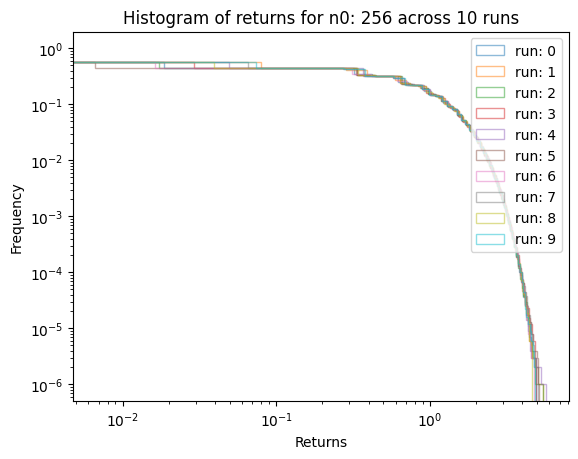

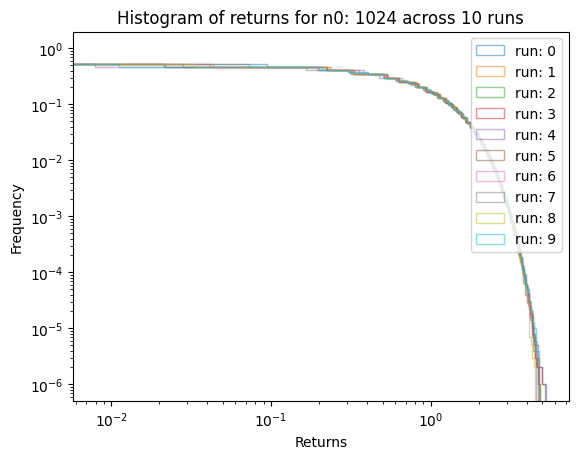

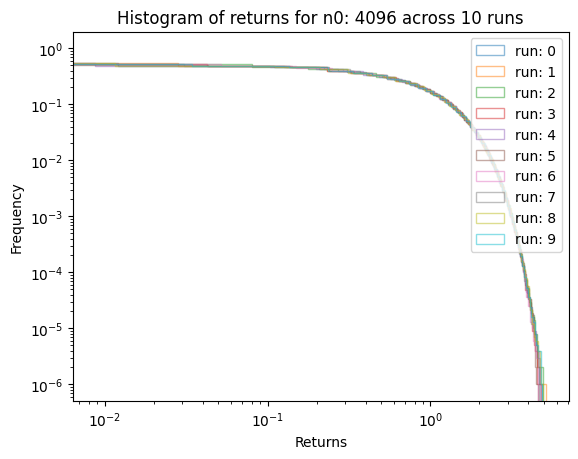

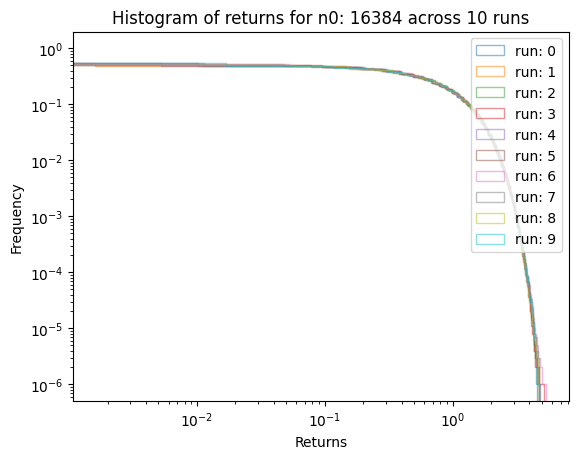

In [347]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(normalized_returns_ABM_results_for_different_n0[n0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of returns for n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [268]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(normalized_returns_ABM_results_for_different_n0[n0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [269]:
dict_of_results_for_different_n0

{256: (7.408958704174003, 7.256886155664131, 7.506700344041423),
 1024: (7.615485797488463, 7.534188774682121, 7.706865126630859),
 4096: (7.708957676949959, 7.609466010663001, 7.855912037269857),
 16384: (7.701272046466035, 7.647770746978592, 7.845687448165449)}

In [276]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of n0
df_of_normalized_results_for_different_n0 = pd.DataFrame(dict_of_results_for_different_n0)
df_of_normalized_results_for_different_n0.index = [ 'mean', 'min', 'max']
df_of_normalized_results_for_different_n0

,256,1024,4096,16384
mean,7.408959,7.615486,7.708958,7.701272
min,7.256886,7.534189,7.609466,7.647771
max,7.506700,7.706865,7.855912,7.845687


In [277]:
# saving the dataframe as a csv file
df_of_normalized_results_for_different_n0.to_csv('df_ABM_normalized_abs_return_results_for_different_V_F.csv')

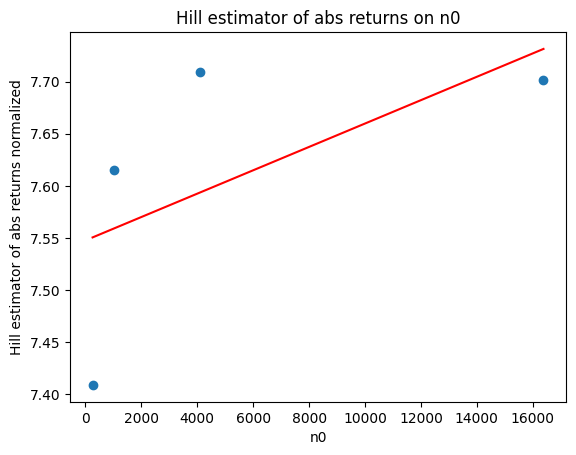

R^2: 0.36081069189123405)
intercept: 7.547650244360525
coefficient: [1.12166015e-05]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.2348672836247265
Thus, we fail to reject the null hypothesis


In [278]:
# regress the Hill estimator of  returns on of n0
X = (np.array(n0_list)).reshape(-1,1)
y = df_of_normalized_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on n0')
plt.xlabel('n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

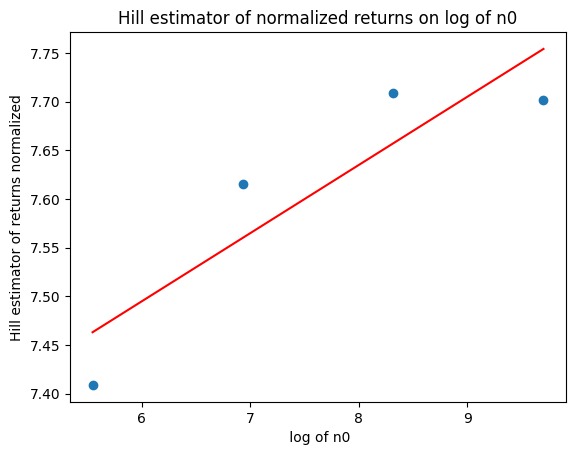

R^2: 0.8039941431779112)
intercept: 7.074942007783939
coefficient: [0.07000042]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.002730502222335321
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [284]:
# regress the Hill estimator of  returns on log of n0
X = np.log((np.array(n0_list)).reshape(-1,1))
y = df_of_normalized_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on log of n0')
plt.xlabel(' log of n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

# Normalizing ABM abs returns (for different V_f, so in effect different p)

In [296]:
# normalizing abs returns for each run (different n0)
normalized_abs_returns_ABM_results_for_different_n0 = []
for n0 in range(len(n0_list)):
    normalized_abs_returns_ABM_results_for_same_n0 = []
    for run in range(10):
        normalized_abs_returns_ABM_results_for_same_n0.append((abs_returns_ABM_results_for_different_n0[n0][run] - np.mean(abs_returns_ABM_results_for_different_n0[n0][run]))/np.std(abs_returns_ABM_results_for_different_n0[n0][run]))
    normalized_abs_returns_ABM_results_for_different_n0.append(normalized_abs_returns_ABM_results_for_same_n0)


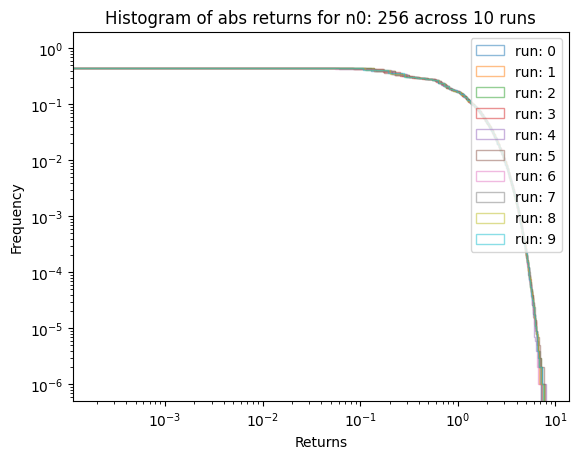

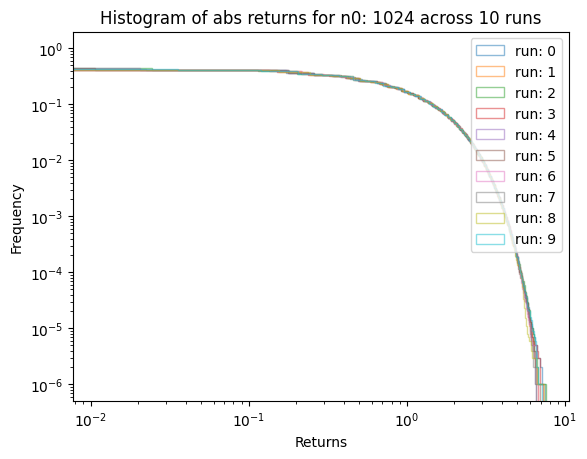

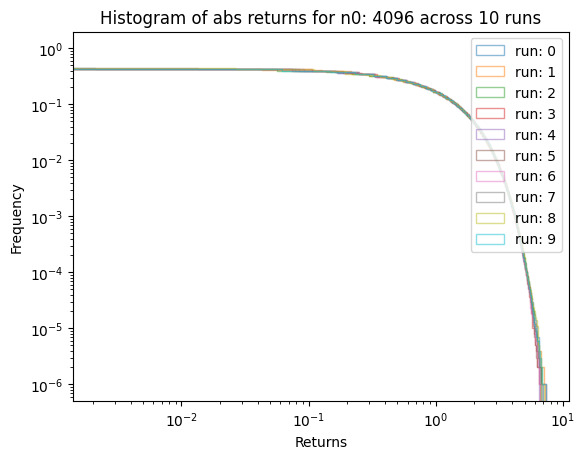

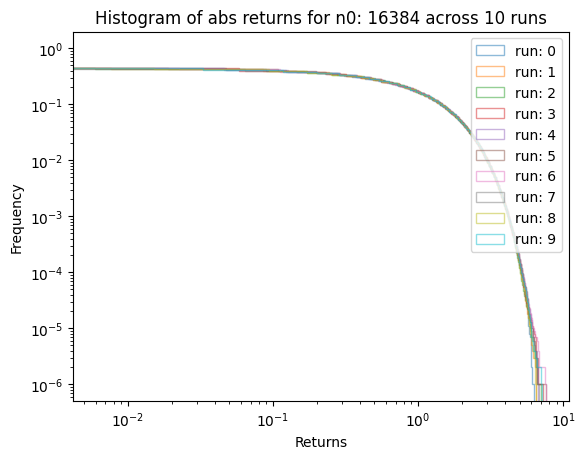

In [321]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(normalized_abs_returns_ABM_results_for_different_n0[n0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of abs returns for n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [298]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(normalized_abs_returns_ABM_results_for_different_n0[n0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [299]:
dict_of_results_for_different_n0

{256: (6.177511766944972, 6.016909354773233, 6.272908812625971),
 1024: (6.368119925710507, 6.255739712031231, 6.438059707618439),
 4096: (6.4520419485509155, 6.3593960073944045, 6.5262719777102225),
 16384: (6.45299461413264, 6.415174074227017, 6.521198426913977)}

In [300]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
df_ABM_normalized_abs_return_results_for_different_n0 = pd.DataFrame(dict_of_results_for_different_n0)
df_ABM_normalized_abs_return_results_for_different_n0.index = [ 'mean', 'min', 'max']
df_ABM_normalized_abs_return_results_for_different_n0

,256,1024,4096,16384
mean,6.177512,6.36812,6.452042,6.452995
min,6.016909,6.25574,6.359396,6.415174
max,6.272909,6.43806,6.526272,6.521198


In [283]:
# saving the dataframe as a csv file
df_ABM_normalized_abs_return_results_for_different_n0.to_csv('df_ABM_normalized_abs_return_results_for_different_n0.csv')

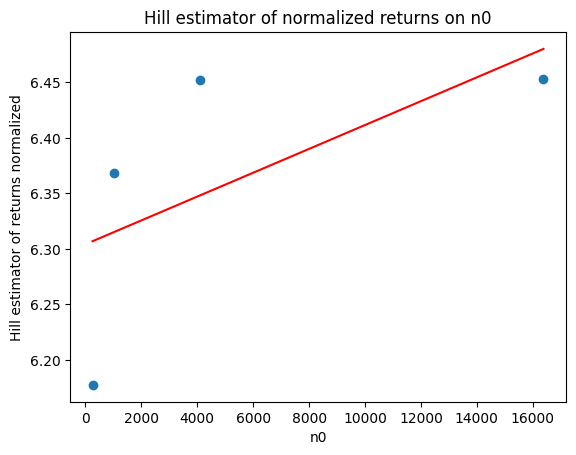

R^2: 0.3840948166307998)
intercept: 6.304229107573266
coefficient: [1.07422714e-05]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.2338584609171617
Thus, we fail to reject the null hypothesis


In [301]:
# regress the Hill estimator of  normalized abs returns on n0
X = (np.array(n0_list)).reshape(-1,1)
y = df_ABM_normalized_abs_return_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on n0')
plt.xlabel('n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

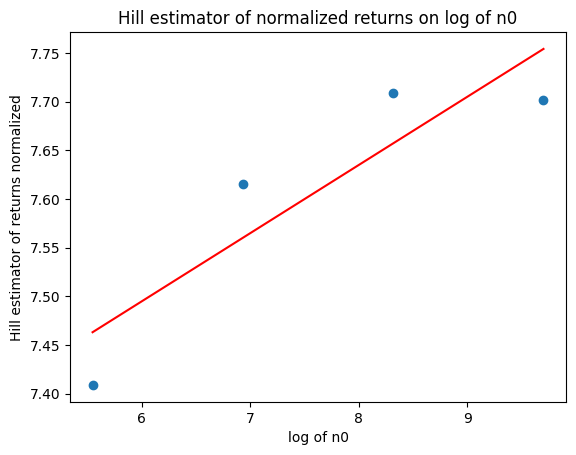

R^2: 0.8039941431779112)
intercept: 7.074942007783939
coefficient: [0.07000042]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.002730502222335321
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [302]:
# regress the Hill estimator of  normalized abs returns on log of n0
X = np.log((np.array(n0_list)).reshape(-1,1))
y = df_of_normalized_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on log of n0')
plt.xlabel('log of n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

# Normalized returns, then take abs for different n0

In [ ]:
results_ABM_10_runs_for_different_n0

In [303]:
# normalizing abs returns for each run (different n0)
abs_normalized_returns_ABM_results_for_different_n0 = []
for n0 in range(len(n0_list)):
    abs_normalized_returns_ABM_results_for_same_n0 = []
    for run in range(10):
        abs_normalized_returns_ABM_results_for_same_n0.append(np.abs((results_ABM_10_runs_for_different_n0[n0][0][run] - np.mean(results_ABM_10_runs_for_different_n0[n0][0][run]))/np.std(results_ABM_10_runs_for_different_n0[n0][0][run])))
    abs_normalized_returns_ABM_results_for_different_n0.append(normalized_abs_returns_ABM_results_for_same_n0)


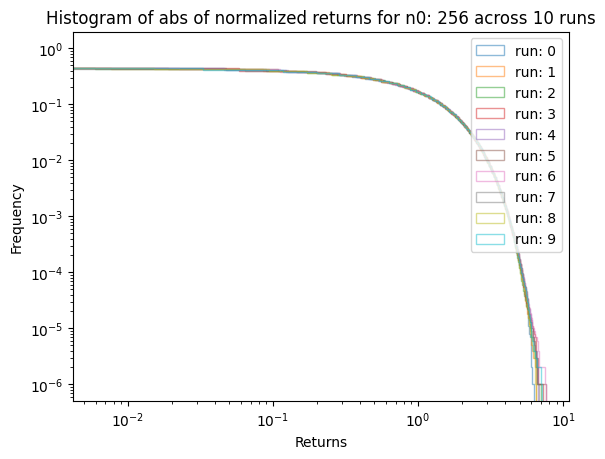

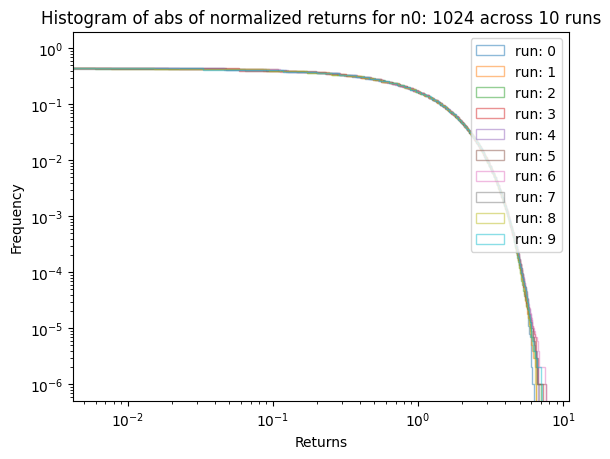

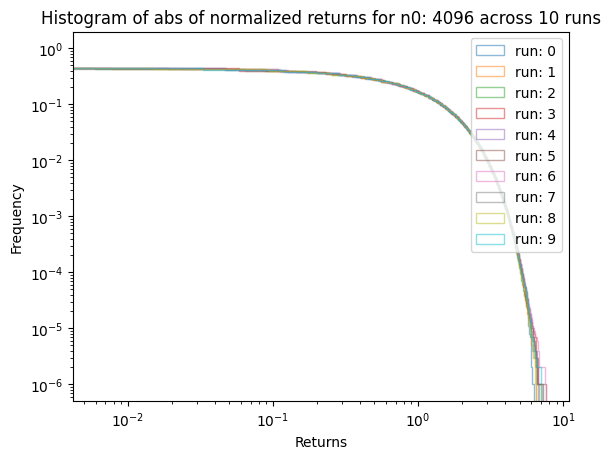

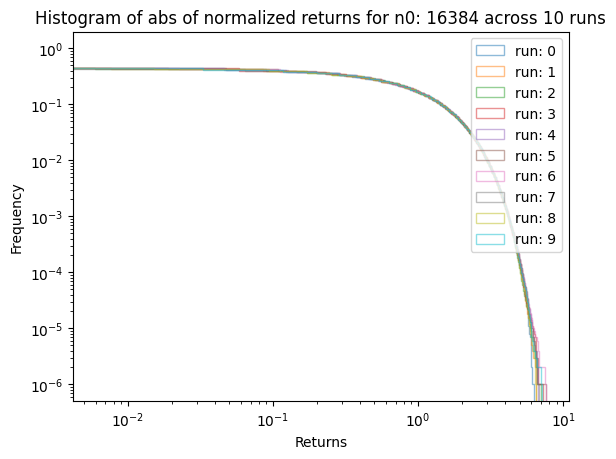

In [322]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(abs_normalized_returns_ABM_results_for_different_n0[n0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of abs of normalized returns for n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [305]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(abs_normalized_returns_ABM_results_for_different_n0[n0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [306]:
dict_of_results_for_different_n0

{256: (6.45299461413264, 6.415174074227017, 6.521198426913977),
 1024: (6.45299461413264, 6.415174074227017, 6.521198426913977),
 4096: (6.45299461413264, 6.415174074227017, 6.521198426913977),
 16384: (6.45299461413264, 6.415174074227017, 6.521198426913977)}

In [307]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
df_ABM_normalized_abs_return_results_for_different_n0 = pd.DataFrame(dict_of_results_for_different_n0)
df_ABM_normalized_abs_return_results_for_different_n0.index = [ 'mean', 'min', 'max']
df_ABM_normalized_abs_return_results_for_different_n0

,256,1024,4096,16384
mean,6.452995,6.452995,6.452995,6.452995
min,6.415174,6.415174,6.415174,6.415174
max,6.521198,6.521198,6.521198,6.521198


In [ ]:
# saving the dataframe as a csv file
df_ABM_normalized_abs_return_results_for_different_n0.to_csv('df_ABM_normalized_abs_return_results_for_different_V_F.csv')

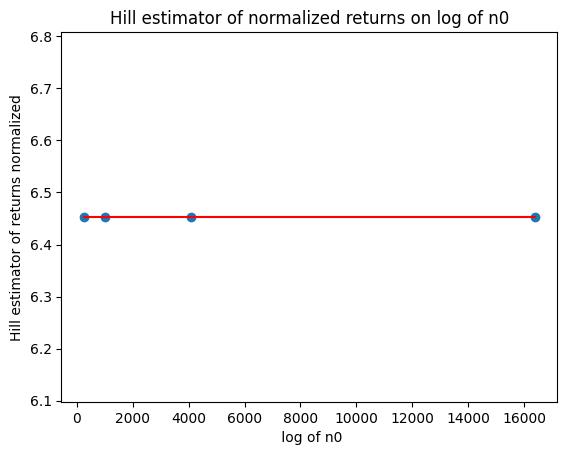

R^2: 1.0)
intercept: 6.45299461413264
coefficient: [0.]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.24189324201403795
Thus, we fail to reject the null hypothesis


In [308]:
# regress the Hill estimator of abs of normalized returns on n0
X = np.array(n0_list).reshape(-1,1)
y = df_ABM_normalized_abs_return_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on log of n0')
plt.xlabel(' log of n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

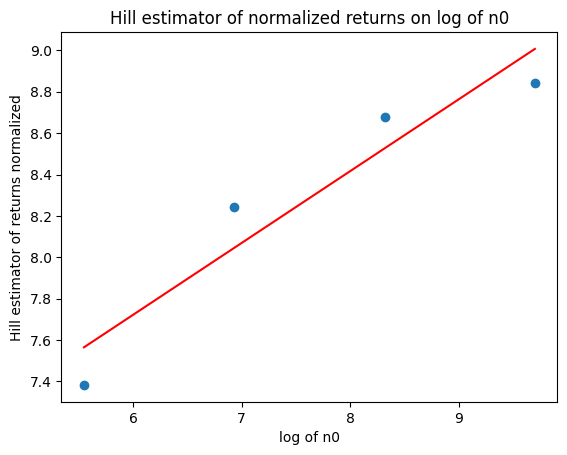

R^2: 0.9040172098783776)
intercept: 5.6425733124619235
coefficient: [0.34668504]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.0010968689193287609
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [290]:
# regress the Hill estimator of abs of normalized returns on n0
X = np.log((np.array(n0_list)).reshape(-1,1))
y = df_ABM_normalized_abs_return_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on log of n0')
plt.xlabel('log of n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

# Normalizing ABM abs returns (for different V_f, so in effect different p) - skeleton code taken from n0, still has to be replaced with V_F code

In [292]:
# normalizing abs returns for each run (different n0)
normalized_abs_returns_ABM_results_for_different_n0 = []
for n0 in range(len(n0_list)):
    normalized_abs_returns_ABM_results_for_same_n0 = []
    for run in range(10):
        normalized_abs_returns_ABM_results_for_same_n0.append((abs_returns_ABM_results_for_different_n0[n0][run] - np.mean(abs_returns_ABM_results_for_different_n0[n0][run]))/np.std(abs_returns_ABM_results_for_different_n0[n0][run]))
    normalized_abs_returns_ABM_results_for_different_n0.append(normalized_abs_returns_ABM_results_for_same_n0)


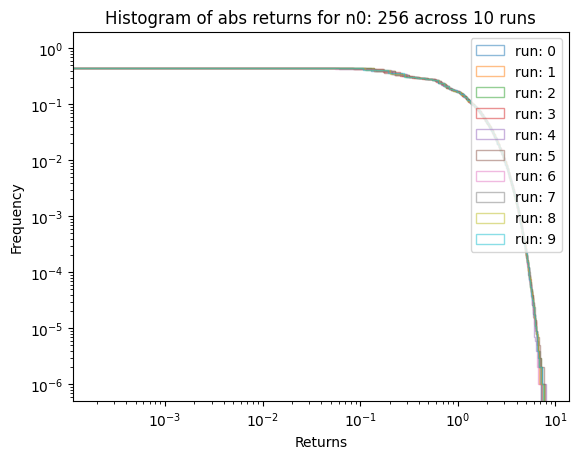

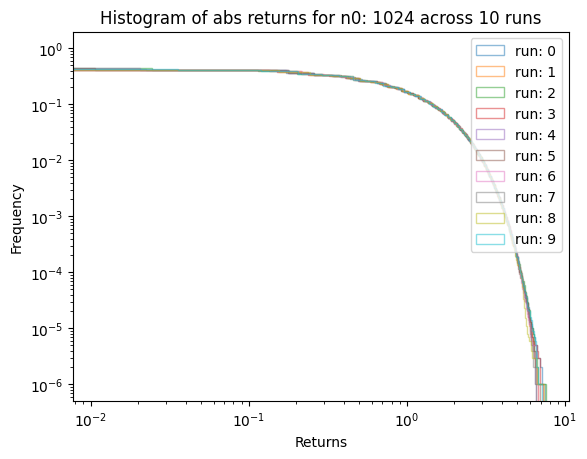

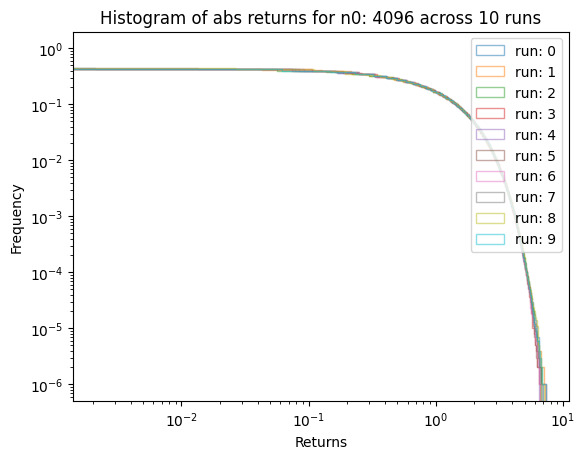

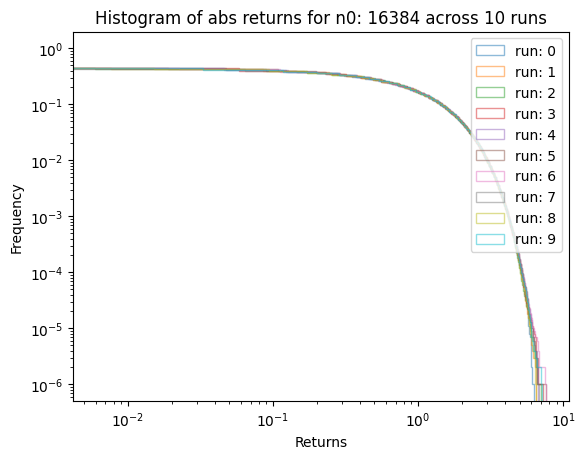

In [323]:
# plot all runs abs returns for different values of V_f on seperate histograms
bins = np.logspace(-4,3, 100)
for n0 in range(len(n0_list)):
    for run in range(10):
        plt.hist(normalized_abs_returns_ABM_results_for_different_n0[n0][run].flatten(), bins=100, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run), density = 1)
        plt.gca().set_xscale("log")
        plt.title(f'Histogram of abs returns for n0: {str(n0_list[n0])} across 10 runs')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()

In [ ]:
dict_of_results_for_different_n0 = {}
for n0 in range(len(n0_list)):
    HE_list_n0= []
    for run in range(10):
        HE_list_n0.append(Hill_estimator(normalized_abs_returns_ABM_results_for_different_n0[n0][run].flatten(),1))
    dict_of_results_for_different_n0[n0_list[n0]] = np.mean(HE_list_n0), np.min(HE_list_n0), np.max(HE_list_n0)

In [ ]:
dict_of_results_for_different_n0

{256: (7.383302784381624, 7.192595610018057, 7.494901388038846),
 1024: (8.242104558973557, 8.098006808620884, 8.337775632304233),
 4096: (8.67833296487263, 8.550667650868975, 8.780809099186827),
 16384: (8.8399183825573, 8.783840204381844, 8.932342331501893)}

In [ ]:
# making a dataframe with the mean, min and max of the Hill estimator of abs return distribution for different values of V_f
df_ABM_normalized_abs_return_results_for_different_n0 = pd.DataFrame(dict_of_results_for_different_n0)
df_ABM_normalized_abs_return_results_for_different_n0.index = [ 'mean', 'min', 'max']
df_ABM_normalized_abs_return_results_for_different_n0

,256,1024,4096,16384
mean,7.383303,8.242105,8.678333,8.839918
min,7.192596,8.098007,8.550668,8.783840
max,7.494901,8.337776,8.780809,8.932342


In [ ]:
# saving the dataframe as a csv file
df_ABM_normalized_abs_return_results_for_different_n0.to_csv('df_ABM_normalized_abs_return_results_for_different_n0.csv')

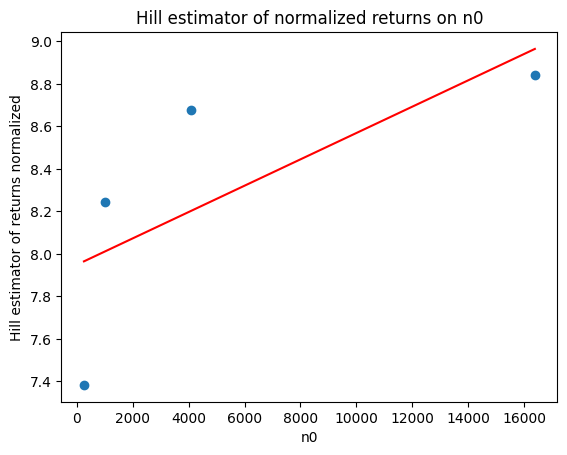

R^2: 0.5048840474414513)
intercept: 7.9487913081629324
coefficient: [6.19712067e-05]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.20793255906815794
Thus, we fail to reject the null hypothesis


In [ ]:
# regress the Hill estimator of  normalized abs returns on n0
X = (np.array(n0_list)).reshape(-1,1)
y = df_ABM_normalized_abs_return_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on n0')
plt.xlabel('n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

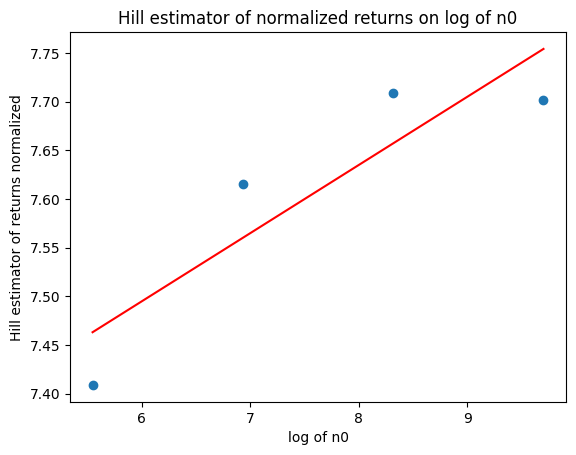

R^2: 0.8039941431779112)
intercept: 7.074942007783939
coefficient: [0.07000042]
Null hypothesis: the coefficient is zero
Alternative hypothesis: the coefficient is not zero
If p value is less than 0.05, we reject the null hypothesis
p value: 0.002730502222335321
Thus, we reject the null hypothesis in favor of the alternative hypothesis
However, the sample size is very small (only 4) so the results are not very reliable


In [ ]:
# regress the Hill estimator of  normalized abs returns on log of n0
X = np.log((np.array(n0_list)).reshape(-1,1))
y = df_of_normalized_results_for_different_n0.loc['mean'].values
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title('Hill estimator of normalized returns on log of n0')
plt.xlabel('log of n0')
plt.ylabel('Hill estimator of returns normalized')
plt.show()
print(f'R^2: {str(reg.score(X, y))})')
print(f'intercept: {str(reg.intercept_)}')
print(f'coefficient: {str(reg.coef_)}')

# getting p value from statsmodels library:

model = sm.OLS(y, X).fit()

# Get the p-value of the regression coefficients
p_value = model.pvalues[0]

print('Null hypothesis: the coefficient is zero')
print('Alternative hypothesis: the coefficient is not zero')
print('If p value is less than 0.05, we reject the null hypothesis')
print(f'p value: {str(p_value)}')
if p_value < 0.05:
    print('Thus, we reject the null hypothesis in favor of the alternative hypothesis')
    print('However, the sample size is very small (only 4) so the results are not very reliable')
else:
    print('Thus, we fail to reject the null hypothesis')

### Volume ABM model across 10 runs:

# Visualization function

In [ ]:
# def Plot_multiple_sims(results_simulated: list, results_real: list, title: str, x_label: str, y_label: str, log: bool):
#     ''' Plots mean and 95 CI of a list of lists of daily returns'''
#     results_simulated_array = np.array(results_simulated)
#     mean_result = np.mean(results_simulated_array, axis=1)
#     CI_95 = np.percentile(results_simulated_array.T, [2.5, 97.5], axis=1)
#     plt.plot(range(len(results_real)), results_real, color='black')
#     plt.plot(range(len(mean_result)), mean_result, color='red')
#     plt.fill_between(range(len(mean_result)), CI_95[0], CI_95[1], color='red', alpha=0.2)
#     for i in range(len(results_simulated)):
#         plt.plot(range(len(results_simulated[i])), results_simulated[i])
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     if log == True:
#         plt.gca().set_yscale("log")
#     plt.show()

In [ ]:
def Plot_multiple_sims(results_simulated, results_real, title:str, x_label:str, y_label:str, log:bool):
    results_simulated_array = np.array(results_simulated)
    results_sorted = np.sort(results_simulated_array, axis = 0)
    mean_results_sorted = np.mean(results_sorted, axis = 0)
    std_results_sorted = np.std(results_sorted, axis = 0)
    n, bins = np.histogram(results_sorted, bins=100)
    plt.errorbar(n, bins, std_results_sorted, fmt='o', ecolor='black', capsize=2)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log == True:
        plt.gca().set_xscale("log")
    plt.show()


In [ ]:
def Plot_multiple_sims(results_simulated, results_real, title:str, x_label:str, y_label:str, log:bool):
    list_of_n = []
    for result in results_simulated:
        bin_heights = plt.hist(result, bins=bin, cumulative=-1, density=True, log=True, histtype='step', alpha=0.5)[0]
        plt.show()
    array_of_n = np.array(list_of_n)
    plt.hist(list_of_n)
    if log == True:
        plt.gca().set_xscale("log")
    plt.show()

# ABM model trading volume distribution

### the paper used parameters: V_f = 0.4, b = 1.0 and n0 = 2**10


In [ ]:
# we will now index the previous results to find the 10 runs that adhere to this parameter settings, we will reiterare the relevant indexers for clarity.
# slicing syntax for the results object is as follows: results_ABM_10_runs[index of desired V_f value in V_f list][0 for returns, 1 for volume][index of desired run in range(10)]

# the 10 runs are for V_f_list carries the following values: [0.2, 0.4, 0.6, 0.8]
# n0 = 2**10 is held constant for all V_f runs
# b = 1.0 is also held constant across all V_f runs

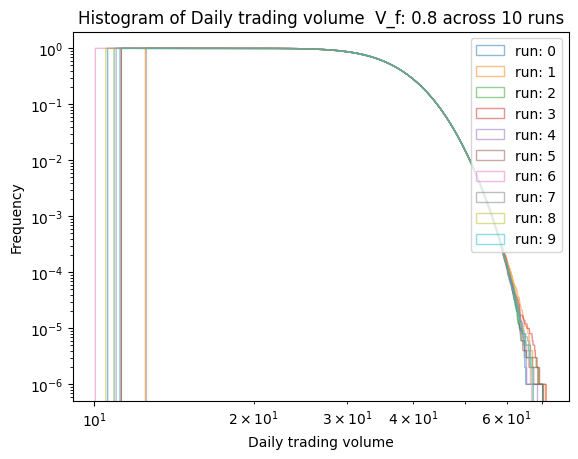

In [326]:
# plot all runs for different values of V_f on hitograms
bins = np.logspace(-4,3, 100)
for run in range(10):
    plt.hist(results_ABM_10_runs_for_different_V_f[V_f][1][run].flatten(), bins=1000, alpha=0.5, cumulative=-1, log = True, histtype='step',label= 'run: ' + str(run),density=1)
    plt.gca().set_xscale("log")
    plt.title(f'Histogram of Daily trading volume  V_f: {str(V_f_list[V_f])} across 10 runs')
    plt.xlabel('Daily trading volume')
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

# Stochastic model run

In [418]:
# other parameters
n = 2**10
t = 10**6
k = 1
M = 500
d = 1.12
runs = 10
init = 1

In [ ]:
V_f_list = [0.2, 0.4, 0.6, 0.8]

print("The V value is", V)
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    print('V_f: ' + str(V_f), 'gives a p value of', p)


In [420]:
# stochastic model without time horizon
stochastic_model_without_time_horizon_results = []
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    result = run_Stochastic_Model(n = n, p = p, init = 1, time_horizon= False, M=M, d=d, t=t, runs=runs)
    stochastic_model_without_time_horizon_results.append(result)

In [422]:
# stochastic model with time horizon
stochastic_model_with_time_horizon_results = []
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    result = run_Stochastic_Model(n = n, p = p, init = 1, time_horizon= True, M=M, d=d, t=t, runs=runs)
    stochastic_model_with_time_horizon_results.append(result)

In [ ]:
    
stoch_array_normalized = stoch.returns-np.mean(stoch.returns)/np.std(stoch.returns)
stoch_time_horizons_array_normalized = stoch_hoz.returns-np.mean(stoch_hoz.returns)/np.std(stoch_hoz.returns)

# Model validation

This section consists two parts: 
1) comparing the simulated daily return data vs. the emperical daily return data + relevant plots & statistical tests
2) comparing the simulated daily trading volume data vs. the emperical trading volume data + relevant plots & statistical tests

#### Notes on the dataset



Data is obtained from the period 2013-2022 (10 years), while Feng et al's (2012) compared their simulated results to emperical data from the 10 year period from 1997-2006.

Some notable remarks on comparison between the datasets:

* Feng et al. considered the S&P 500, but only stocks listed for the entire period, which were 307, in our case we had 463 stocks, a notable increase.
* We obtained volume and shares outstanding data from Compustat database via WRDS, while obtaining open and closing data from Yahoo finance while Feng et al obtained all these variables from the compustat database.
* Where volume, sharesoutsanding, open or close data was missing for a certain day, we imputed the values using a backfill method. If a stock was unlisted, this caused 0's in the dataset for the days it was unlisted, which might bias the data.




### 1.  Comparing simulated daily resturn vs. real stock daily return data

#### Importing real stock data

In [406]:
df_open_clean = pd.read_csv('data/df_open_clean.csv', parse_dates=True, index_col=0)
df_close_clean = pd.read_csv('data/df_close_clean.csv', parse_dates=True, index_col=0)

In [407]:
assert df_open_clean.index.dtype == 'datetime64[ns]'
assert df_close_clean.index.dtype == 'datetime64[ns]'

In [416]:
df_close_normalised = (df_close_clean - df_close_clean.mean()) / df_close_clean.std()
df_open_normalised = (df_open_clean - df_open_clean.mean()) / df_open_clean.std()

In [408]:
# calculation of returns following feng et al. (2012) method:
df_real_returns_log_difference = df_close_clean.apply(np.log) - df_open_clean.apply(np.log) 

# taking absolute of real returns
df_real_returns_log_difference_abs = df_real_returns_log_difference.abs()

In [409]:
# Flattening dataframes
real_returns_log_difference_abs_flattened = df_real_returns_log_difference_abs.values.flatten()

In [410]:
sorted_log = sorted(real_returns_log_difference_abs_flattened)

### Comparing real vs. simulated return data

In [411]:
# volume data
volume_abm_results = results_ABM_10_runs_for_different_V_f[0][0][1]
# return data 
return_abm_results = np.array(abs_normalized_returns_ABM_results_for_different_n0[1]).flatten()
# real_data_returns = df_real_returns_log_difference_abs.abs().to_numpy().flatten()
real_data_returns = real_returns_log_difference_abs_flattened

In [412]:
return_datasets = [return_abm_results, real_data_returns]
labels = ['ABM returns', 'Real data returns']

In [413]:
real_data_returns

array([0.00690063, 0.01877306, 0.01370072, ..., 0.00274886, 0.00865639,
       0.011251  ])

In [414]:
df_real_returns_log_difference_abs

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.006901,0.018773,0.013701,0.008687,0.005711,0.002297,0.007770,0.000000,0.021516,0.011015,...,0.022551,0.014503,0.012865,0.010425,0.007431,0.004716,0.005050,0.001478,0.022717,0.005015
2013-01-03,0.002144,0.026013,0.004954,0.010606,0.004869,0.003221,0.011183,0.000452,0.000727,0.010278,...,0.001030,0.006473,0.003291,0.001017,0.002225,0.003278,0.006681,0.013783,0.005135,0.001363
2013-01-04,0.016942,0.065218,0.011888,0.018742,0.006666,0.010816,0.007831,0.007196,0.003910,0.006578,...,0.004775,0.007062,0.002558,0.005184,0.005412,0.005102,0.012964,0.004356,0.003942,0.028209
2013-01-07,0.001174,0.003375,0.003003,0.003633,0.009037,0.002970,0.009644,0.003389,0.004510,0.003432,...,0.006125,0.003803,0.006251,0.004312,0.005148,0.006642,0.001472,0.006234,0.008101,0.000888
2013-01-08,0.006141,0.017971,0.013761,0.007397,0.017059,0.000229,0.001801,0.001583,0.007678,0.009484,...,0.009819,0.000413,0.003319,0.007487,0.005919,0.009327,0.009889,0.001733,0.006864,0.018390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001475,0.015861,0.009678,0.007154,0.001776,0.004717,0.004726,0.007443,0.001128,0.010246,...,0.014071,0.000124,0.014056,0.016046,0.016472,0.001094,0.003653,0.005938,0.005494,0.003515
2022-12-27,0.002142,0.007157,0.012071,0.010329,0.003063,0.005900,0.002028,0.003779,0.002297,0.008647,...,0.003183,0.034748,0.008137,0.008384,0.004375,0.006615,0.004630,0.002202,0.006595,0.003898
2022-12-28,0.011347,0.016103,0.002412,0.028393,0.009020,0.013060,0.010975,0.016948,0.011262,0.020290,...,0.025146,0.041935,0.010011,0.014018,0.038314,0.017110,0.006782,0.011443,0.014639,0.018588


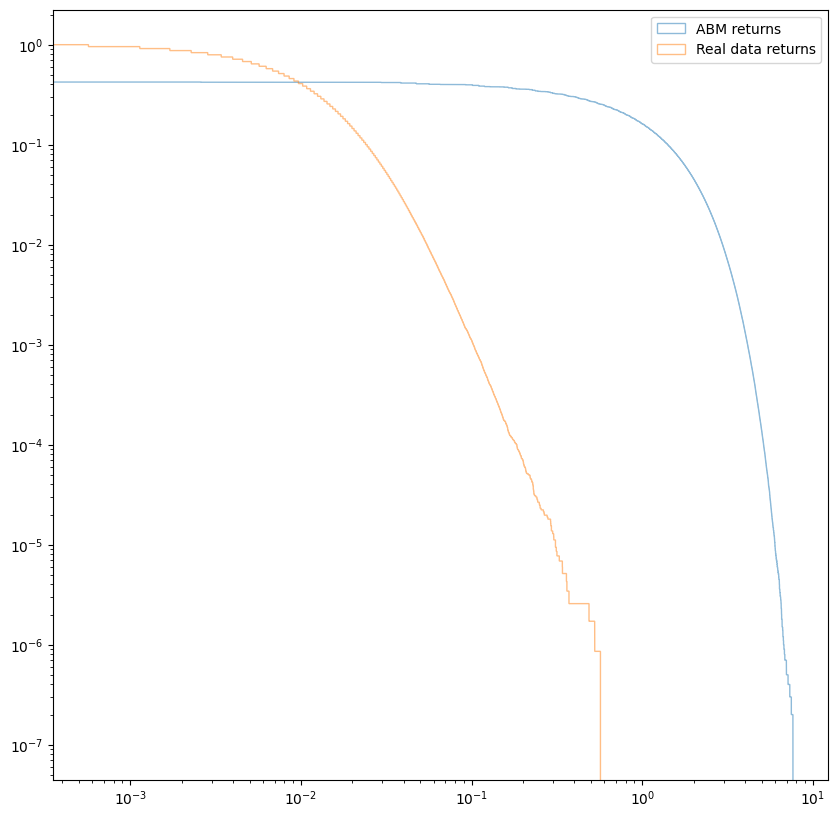

In [415]:
bins=np.logspace(start=0, stop=np.log(10), num=1000)
plt.figure(figsize=(10,10))
for i in range(len(return_datasets)):
    plt.hist(return_datasets[i], bins=1000, cumulative=-1, density=True, log=True, histtype='step', label = labels[i], alpha = 0.5)
plt.gca().set_xscale("log")
plt.legend()
plt.show()

# Analysis on the fit

### RMSE

In [ ]:
# Get bin heights for each dataset

for dataset in return_datasets:
    binheights, bin_edges, _ = plt.hist(dataset, bins=bin, alpha=0.5, cumulative=-1, density=True, log = True, histtype='step')
    list_of_bin_heights.append(binheights) 

In [ ]:
def RMSE(predictions:list[float], targets:list[float]) -> float:
    '''Returns the root mean squared error between predictions and target values as a float'''
    return math.sqrt(np.mean([(predictions[i] - targets[i]) ** 2 for i in range(len(targets))]))

In [ ]:
model_results = [list_of_bin_heights[0], list_of_bin_heights[1], list_of_bin_heights[2]]

for result in model_results:
    print(RMSE(result, list_of_bin_heights[-1]))


0.012133062213797315
0.04341897700784183
0.03156145483275402


In [ ]:
def residuals(predictions:list[float], targets:list[float]) -> list[float]:
    '''Returns the residuals between predictions and target values as a list of floats'''
    return np.array(predictions) - np.array(targets)

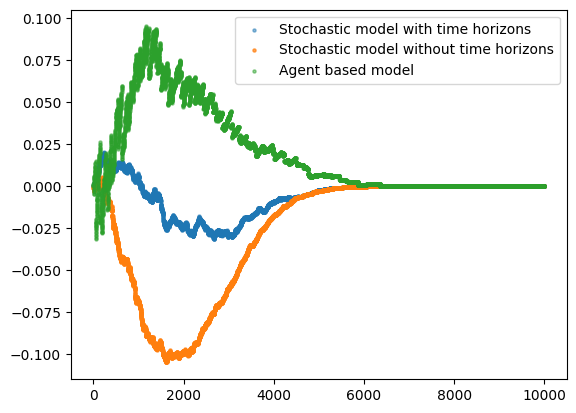

In [ ]:
# plot residuals as a scatter plot
residuals_stoch_horizons = residuals(list_of_bin_heights[0], list_of_bin_heights[-1])
residuals_stoch = residuals(list_of_bin_heights[1], list_of_bin_heights[-1])
residuals_ABM = residuals(list_of_bin_heights[2], list_of_bin_heights[-1])

plt.scatter(range(len(residuals_stoch_horizons)), residuals_stoch_horizons, label = 'Stochastic model with time horizons', alpha = 0.5, s=5)
plt.scatter(range(len(residuals_stoch)), residuals_stoch, label = 'Stochastic model without time horizons', alpha = 0.7, s=5)
plt.scatter(range(len(residuals_ABM)), residuals_ABM, label = 'Agent based model', alpha = 0.5, s=5)
plt.legend()
plt.show()

In [ ]:
# code for kolmogorov-smirnov test for similarity of distributions: reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
# assumed samples are independent

# making a matrix in which ks test results will be visualised

array_for_ks_test_results = np.zeros(((len(return_datasets), len(return_datasets))))
for i in range(len(return_datasets)):
    for j in range(len(return_datasets)):
        # returning the 1st element of ks test result as this is the p-value of the ks test
        # print(stats.kstest(return_datasets[i], return_datasets[j])[1])
            array_for_ks_test_results[i,j] = stats.kstest(return_datasets[i], return_datasets[j])[1]

In [ ]:
df_of_kstest_results = pd.DataFrame(array_for_ks_test_results)
df_of_kstest_results

,0,1,2,3,4
0,1.000000e+00,4.655128e-287,0.000000e+00,2.546482e-55,0.0
1,4.655128e-287,1.000000e+00,1.362420e-190,2.380721e-284,0.0
2,0.000000e+00,1.362420e-190,1.000000e+00,0.000000e+00,0.0
3,2.546482e-55,2.380721e-284,0.000000e+00,1.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0


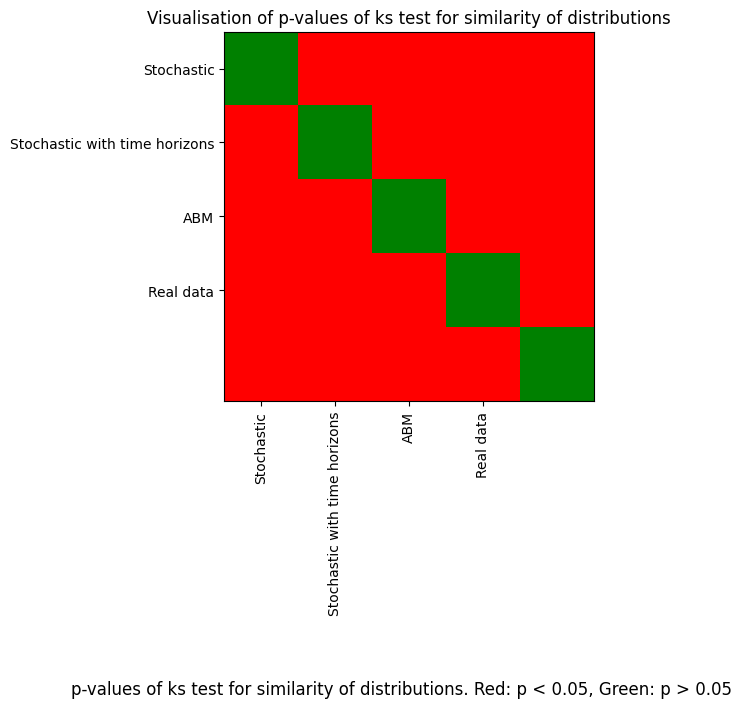

In [ ]:
color_matrix = np.where(array_for_ks_test_results < 0.05, 0,1)
cmap = (mpl.colors.ListedColormap(['red', 'green']))
plt.imshow(color_matrix, cmap=cmap, vmin=0, vmax=1)
plt.xticks([0,1,2,3], ['Stochastic', 'Stochastic with time horizons', 'ABM', 'Real data'], rotation = 90)
plt.yticks([0,1,2,3], ['Stochastic', 'Stochastic with time horizons', 'ABM', 'Real data'])
plt.title("Visualisation of p-values of ks test for similarity of distributions")
plt.figtext(0.5, -0.5, "Red: p < 0.05, Green: p > 0.05", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Empirical trading volume data probability graph

In [ ]:
vol_mean = np.mean(df_volume_clean.values.flatten()) # Calculate the mean of all the daily volume
df_normalized_vol = df_volume_clean/vol_mean
sorted_vol = np.sort(df_normalized_vol.values.flatten())

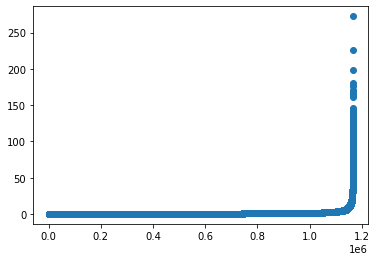

No handles with labels found to put in legend.


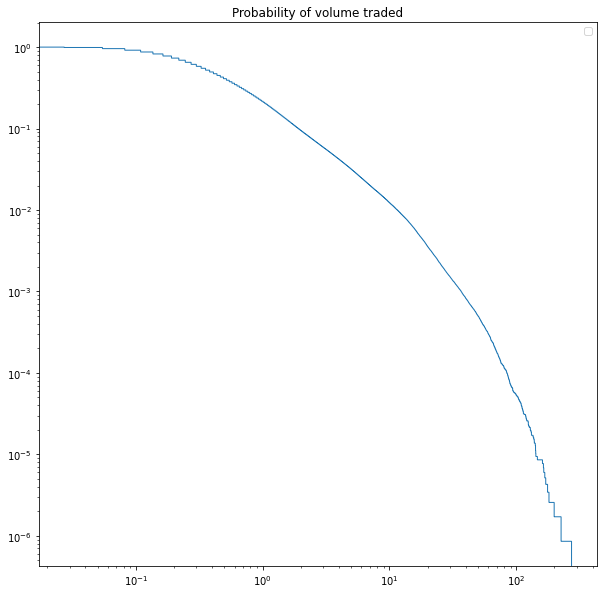

In [ ]:
# scatter plot 
x = np.arange(0, len(sorted_vol), 1)
plt.scatter(x, sorted_vol)
plt.show()

# non-log plot
plt.figure(figsize=(10,10))
plt.hist(sorted_vol, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
plt.gca().set_xscale("log")
plt.title('Probability of volume traded')
plt.legend()
plt.show()

## 2. Simulated vs. emperical trading volume data

#### Importing & Normalizing emperical volume data

In [ ]:
df_volume_clean_wrds

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,6290038.0,43167060.0,800421.0,19986670.0,13767660.0,1972401.0,20266410.0,977536.0,4039095.0,6483720.0,...,6594952.0,2486815.0,2702053.0,16144970.0,856539.0,927252.0,4376855.0,1397462.0,213748.0,2551059.0
2013-01-03,4114289.0,43167060.0,520539.0,12579170.0,16739210.0,2027242.0,22148090.0,655362.0,3340674.0,3905904.0,...,3967047.0,1731879.0,2403510.0,13268470.0,525445.0,610706.0,2627253.0,1574966.0,99849.0,2267804.0
2013-01-04,4601506.0,43167060.0,614933.0,21196320.0,21372200.0,2462183.0,15819140.0,530563.0,3145680.0,3809146.0,...,3624749.0,2129025.0,1743995.0,11427870.0,660389.0,563325.0,2719375.0,1189537.0,145944.0,3577660.0
2013-01-07,2567557.0,43167060.0,1051969.0,17262620.0,17896920.0,1803504.0,13121470.0,423123.0,2262426.0,3632022.0,...,2450680.0,1500928.0,2853210.0,11799780.0,554059.0,481287.0,3729703.0,954238.0,90581.0,2285917.0
2013-01-08,2787813.0,43167060.0,840003.0,16350190.0,17863000.0,1533163.0,15053860.0,580903.0,2468876.0,3080868.0,...,5203250.0,975921.0,3762904.0,14228400.0,698803.0,1084482.0,12406140.0,905965.0,112590.0,3758558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,779426.0,17160810.0,524534.0,63755280.0,2684724.0,528005.0,2618369.0,890265.0,1213251.0,1627915.0,...,1932785.0,1134475.0,1201346.0,11534290.0,1264320.0,321094.0,699735.0,789770.0,180932.0,1263345.0
2022-12-27,879543.0,18836880.0,717073.0,68887690.0,2669090.0,740310.0,2927352.0,666705.0,1009563.0,1463215.0,...,2265992.0,4024281.0,1580610.0,11874640.0,998778.0,468173.0,1299183.0,742499.0,252510.0,704184.0
2022-12-28,784312.0,20388570.0,685513.0,85247210.0,2944327.0,804725.0,3264409.0,1107929.0,1386969.0,1668511.0,...,2244112.0,2131050.0,1513689.0,10675270.0,1430535.0,480378.0,964755.0,750108.0,241209.0,679957.0


In [ ]:
 df_volume_clean_wrds.resample('Y').mean().sum(axis=1)

Date
2013-12-31    2.273725e+09
2014-12-31    2.081439e+09
2015-12-31    2.183814e+09
2016-12-31    2.282949e+09
2017-12-31    2.031400e+09
2018-12-31    2.299419e+09
2019-12-31    1.918719e+09
2020-12-31    2.552718e+09
2021-12-31    2.057483e+09
2022-12-31    2.351651e+09
Freq: A-DEC, dtype: float64

In [ ]:
df_volume_clean_wrds

NameError: name 'df_volume_clean_wrds' is not defined

In [ ]:
mean_yearly_volume_per_stock = df_volume_clean_wrds.resample('Y').mean()


In [ ]:
summed_yearly_volume_per_stock = df_volume_clean_wrds.sum()

In [ ]:
summed_yearly_volume_per_stock.mean(axis=1)


Date
2013-12-31    1.237535e+09
2014-12-31    1.132878e+09
2015-12-31    1.188599e+09
2016-12-31    1.242555e+09
2017-12-31    1.101256e+09
2018-12-31    1.246553e+09
2019-12-31    1.044313e+09
2020-12-31    1.394898e+09
2021-12-31    1.119839e+09
2022-12-31    1.274869e+09
Freq: A-DEC, dtype: float64

In [ ]:
mean_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,3.045449e+06,4.131149e+07,7.816195e+05,1.445025e+07,6.257611e+06,1.990433e+06,8.060460e+06,4.436165e+05,3.099721e+06,3.592994e+06,...,4.695080e+06,1.250706e+06,3.301607e+06,1.262712e+07,7.688385e+05,1.255856e+06,3.634615e+06,1.054791e+06,174106.337302,2.078601e+06
2014-12-31,2.272985e+06,1.238078e+07,7.949913e+05,3.452680e+07,9.130938e+06,1.698106e+06,6.013064e+06,5.164888e+05,2.799480e+06,3.354736e+06,...,4.641452e+06,1.795404e+06,2.740702e+06,1.172101e+07,8.334123e+05,1.013436e+06,3.152440e+06,1.237488e+06,471274.000000,2.466435e+06
2015-12-31,2.559315e+06,1.153099e+07,1.059096e+06,5.164626e+07,1.046825e+07,2.043598e+06,5.817286e+06,4.519217e+05,2.481861e+06,2.791614e+06,...,3.727376e+06,3.208687e+06,3.302383e+06,1.406299e+07,9.482419e+05,1.137982e+06,4.075438e+06,1.231677e+06,530913.865079,2.707760e+06
2016-12-31,2.081338e+06,9.160580e+06,1.033338e+06,3.826767e+07,7.995381e+06,2.543463e+06,9.061932e+06,3.796295e+05,2.555518e+06,2.822106e+06,...,4.968402e+06,3.417733e+06,3.267105e+06,1.239459e+07,1.649353e+06,1.312734e+06,3.469905e+06,1.571417e+06,648893.698413,3.363428e+06
2017-12-31,1.846746e+06,5.862530e+06,1.657572e+06,2.700270e+07,5.967196e+06,1.785437e+06,6.598606e+06,4.590920e+05,2.114190e+06,2.460035e+06,...,3.253748e+06,1.987586e+06,2.628906e+06,1.090880e+07,1.621055e+06,1.178522e+06,2.142878e+06,1.359164e+06,328787.872510,2.478809e+06
2018-12-31,2.544049e+06,6.842145e+06,1.142888e+06,3.376838e+07,7.019459e+06,1.546483e+06,6.179530e+06,9.331440e+05,2.235993e+06,3.259894e+06,...,4.486538e+06,3.151586e+06,3.682863e+06,1.348126e+07,2.712300e+06,1.103273e+06,2.110327e+06,1.193503e+06,402520.378486,2.351557e+06
2019-12-31,2.149770e+06,6.974919e+06,1.125318e+06,2.794224e+07,7.814414e+06,1.326785e+06,5.144075e+06,1.241748e+06,1.851884e+06,2.651977e+06,...,4.126360e+06,2.032719e+06,3.203835e+06,1.159706e+07,1.669033e+06,8.411636e+05,1.710212e+06,1.133707e+06,558678.773810,2.232458e+06
2020-12-31,1.849400e+06,6.772373e+07,9.835181e+05,7.297082e+07,9.429728e+06,1.288009e+06,6.686208e+06,2.038213e+06,2.315411e+06,3.065785e+06,...,5.043295e+06,4.745901e+06,3.070552e+06,2.876056e+07,1.803349e+06,1.169193e+06,2.150342e+06,1.376043e+06,407713.592885,2.556167e+06
2021-12-31,1.619945e+06,3.812482e+07,7.704331e+05,9.012147e+07,6.804253e+06,9.788828e+05,5.343656e+06,2.040180e+06,1.987258e+06,2.365483e+06,...,4.343849e+06,3.344809e+06,2.941258e+06,2.387800e+07,1.500157e+06,8.670148e+05,1.538044e+06,1.373060e+06,279893.392857,1.330721e+06


In [ ]:
summed_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,767453144.0,1.041050e+10,196968125.0,3.641464e+09,1.576918e+09,501589171.0,2.031236e+09,111791346.0,781129646.0,905434416.0,...,1.183160e+09,3.151779e+08,832004873.0,3.182034e+09,193747292.0,316475586.0,9.159229e+08,265807348.0,43874797.0,523807529.0
2014-12-31,572792205.0,3.119956e+09,200337816.0,8.700754e+09,2.300996e+09,427922742.0,1.515292e+09,130155176.0,705468864.0,845393387.0,...,1.169646e+09,4.524419e+08,690657014.0,2.953694e+09,210019905.0,255385755.0,7.944149e+08,311846858.0,118761048.0,621541534.0
2015-12-31,644947386.0,2.905810e+09,266892101.0,1.301486e+10,2.638000e+09,514986674.0,1.465956e+09,113884277.0,625429030.0,703486686.0,...,9.392988e+08,8.085892e+08,832200460.0,3.543873e+09,238956966.0,286771494.0,1.027010e+09,310382529.0,133790294.0,682355398.0
2016-12-31,524497072.0,2.308466e+09,260401211.0,9.643454e+09,2.014836e+09,640952754.0,2.283607e+09,95666634.0,643990584.0,711170803.0,...,1.252037e+09,8.612687e+08,823310527.0,3.123437e+09,415636987.0,330809056.0,8.744160e+08,395997079.0,163521212.0,847583846.0
2017-12-31,463533363.0,1.471495e+09,416050529.0,6.777678e+09,1.497766e+09,448144752.0,1.656250e+09,115232093.0,530661713.0,617468777.0,...,8.166907e+08,4.988840e+08,659855408.0,2.738108e+09,406884728.0,295809059.0,5.378625e+08,341150227.0,82525756.0,622180999.0
2018-12-31,638556192.0,1.717378e+09,286864831.0,8.475864e+09,1.761884e+09,388167302.0,1.551062e+09,234219148.0,561234169.0,818233399.0,...,1.126121e+09,7.910482e+08,924398608.0,3.383795e+09,680787272.0,276921522.0,5.296921e+08,299569167.0,101032615.0,590240925.0
2019-12-31,541741999.0,1.757680e+09,283580145.0,7.041445e+09,1.969232e+09,334349821.0,1.296307e+09,312920482.0,466674709.0,668298320.0,...,1.039843e+09,5.122453e+08,807366295.0,2.922459e+09,420596285.0,211973217.0,4.309735e+08,285694055.0,140787051.0,562579511.0
2020-12-31,467898125.0,1.713410e+10,248830071.0,1.846162e+10,2.385721e+09,325866310.0,1.691611e+09,515667954.0,585799043.0,775643483.0,...,1.275954e+09,1.200713e+09,776849560.0,7.276422e+09,456247392.0,295805943.0,5.440366e+08,348138802.0,103151539.0,646710209.0
2021-12-31,408226151.0,9.607454e+09,194149148.0,2.271061e+10,1.714672e+09,246678461.0,1.346601e+09,514125398.0,500788983.0,596101759.0,...,1.094650e+09,8.428919e+08,741197083.0,6.017257e+09,378039671.0,218487732.0,3.875870e+08,346011189.0,70533135.0,335341777.0


In [ ]:
normalized_yearly_volume_per_stock = summed_yearly_volume_per_stock/mean_yearly_volume_per_stock
normalized_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2014-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2015-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2016-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2017-12-31,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0
2018-12-31,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0
2019-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2020-12-31,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
2021-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0


In [ ]:
summed_yearly_volume

A       5.456551e+09
AAL     5.929510e+10
AAP     2.573681e+09
AAPL    1.204554e+11
ABBV    1.948171e+10
            ...     
XYL     2.770121e+09
YUM     6.493333e+09
ZBH     3.252852e+09
ZBRA    1.069625e+09
ZION    5.799837e+09
Length: 463, dtype: float64

In [ ]:
summed_yearly_volume

A       5.456551e+09
AAL     5.929510e+10
AAP     2.573681e+09
AAPL    1.204554e+11
ABBV    1.948171e+10
            ...     
XYL     2.770121e+09
YUM     6.493333e+09
ZBH     3.252852e+09
ZBRA    1.069625e+09
ZION    5.799837e+09
Length: 463, dtype: float64

In [ ]:
summed_yearly_volume_normalized = summed_yearly_volume - np.mean(summed_yearly_volume)

# Model verification: running with feng et al's parameters settings

In Feng et al's paper, because different time period is chosen, the velocity calculation results in different probabilities of trading, namely: 
"For V_f: 0.2, 0.4, 0.6, 0.8, and estimate the corresponding values of p as 0.0174, 0.0154, 0.0134, 0.0115" (Feng et al. 2012) https://www.pnas.org/doi/10.1073/pnas.1205013109


In [ ]:
p_list = [0.0174, 0.0154, 0.0134, 0.0115]

In [ ]:
# other parameters
n = 2**10
t = 10**6
omega = 1
b = 1.0
size = 1
k = 1
n0 = 2**10



In [ ]:
# ABM returns for different V_f's (so in effect different p) across 10 runs
# 10 runs, for different values of V_f , using n0 = 2**10
results_ABM_10_runs_for_different_authors_p = []
for p in p_list:
    run_results = run_ABM(p, n, size, k, omega, b, t, runs)
    results_ABM_10_runs_for_different_authors_p.append(run_results)

# Long term memory: ACF plots of absolute and squared returns of emperical data vs. simulation

In [ ]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df_closing_SnP500_39_years_clean = pd.read_csv('data/df_closing_SnP500_39_years_clean.csv', parse_dates = True, index_col = 'Date')

In [ ]:
df_closing_SnP500_39_years_clean

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-03,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-04,44.00,24.60,41.70,27.875,35.00,23.625,47.500,21.25,15.17,13.75,...,34.125,13.01,37.000,37.125,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-05,44.00,24.60,41.70,28.250,35.00,23.625,48.000,21.25,15.17,13.75,...,35.000,13.01,37.250,37.375,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-06,44.00,24.60,41.70,27.750,35.00,23.625,47.875,21.25,15.17,13.75,...,34.750,13.01,37.625,37.375,8.75,24.25,29.125,29.76,18.25,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,149.23,12.71,143.28,131.860,163.10,170.010,108.180,63.38,266.09,338.45,...,31.490,80.72,70.930,108.680,31.83,109.73,128.900,126.69,248.22,48.45
2022-12-27,149.55,12.53,145.02,130.030,162.99,169.000,108.570,63.62,265.31,335.09,...,31.470,84.33,71.570,110.190,32.07,110.72,129.900,127.28,251.00,48.84
2022-12-28,148.09,12.32,145.30,126.040,162.23,167.360,107.830,62.60,263.12,328.33,...,30.630,80.09,70.570,108.380,30.98,108.94,129.310,125.99,246.84,47.97


In [ ]:
df_closing_DOW_39_years_clean = pd.read_csv('data/df_closing_DOW_39_years_clean.csv', parse_dates = True, index_col = 'Date')


In [ ]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [ ]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [ ]:
df_closing_DOW_39_years_clean.columns

Index(['UNH', 'GS', 'HD', 'AMGN', 'MCD', 'CAT', 'MSFT', 'V', 'HON', 'BA',
       'TRV', 'CVX', 'JNJ', 'AXP', 'PG', 'CRM', 'IBM', 'WMT', 'JPM', 'AAPL',
       'MMM', 'NKE', 'MRK', 'DIS', 'KO', 'DOW', 'CSCO', 'VZ', 'WBA', 'INTC'],
      dtype='object')

In [ ]:
returns = df_closing_DOW_39_years_clean.pct_change().dropna()
abs_returns = returns.abs()
squared_returns = returns

In [ ]:
abs_returns

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984-01-04,0.000000,0.000000,0.029703,0.017241,0.017953,0.062670,0.000000,0.000000,0.008989,0.042614,...,0.022796,0.033613,0.001383,0.007126,0.030516,0.000000,0.000000,0.029795,0.003311,0.009202
1984-01-05,0.000000,0.000000,0.061224,0.052632,0.019400,0.005128,0.000000,0.000000,0.009070,0.040872,...,0.008915,0.032520,0.013850,0.004717,0.006834,0.000000,0.000000,0.009042,0.003322,0.045593
1984-01-06,0.000000,0.000000,0.009615,0.066667,0.000000,0.007653,0.000000,0.000000,0.020225,0.002618,...,0.002946,0.031496,0.004098,0.009390,0.011312,0.000000,0.000000,0.017921,0.003311,0.005814
1984-01-09,0.000000,0.000000,0.000000,0.015625,0.029412,0.010283,0.000000,0.000000,0.004587,0.002625,...,0.008863,0.007634,0.010974,0.000000,0.013730,0.000000,0.000000,0.012324,0.023102,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.008006,0.000203,0.008256,0.005052,0.006773,0.009809,0.002267,0.003755,0.007348,0.004303,...,0.011925,0.003941,0.005574,0.015461,0.007578,0.013753,0.003381,0.002610,0.004943,0.004621
2022-12-27,0.001280,0.010246,0.002573,0.002008,0.002728,0.013632,0.007414,0.002235,0.004769,0.001798,...,0.000666,0.011269,0.002324,0.018634,0.006111,0.006488,0.001053,0.021869,0.008284,0.005749
2022-12-28,0.006654,0.003217,0.011954,0.007479,0.006483,0.015464,0.010255,0.006302,0.012565,0.005385,...,0.016054,0.021946,0.009276,0.025472,0.009967,0.023442,0.009678,0.011210,0.019055,0.015420


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_27880\4023233967.py:16: RuntimeWarning: invalid value encountered in log
  acf_squared_returns_log = np.log(acf_squared_returns)
C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


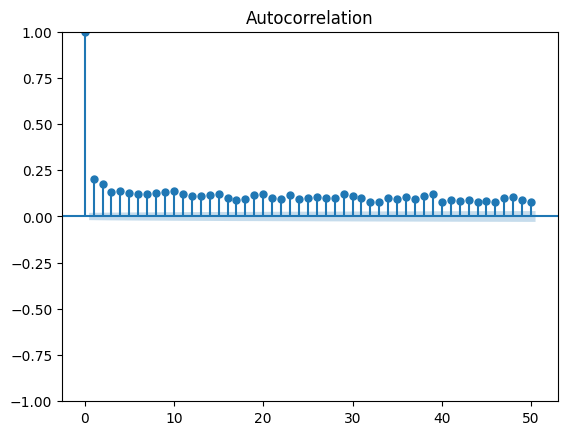

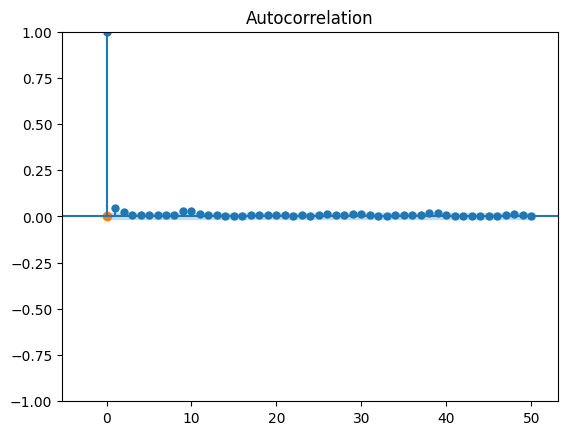

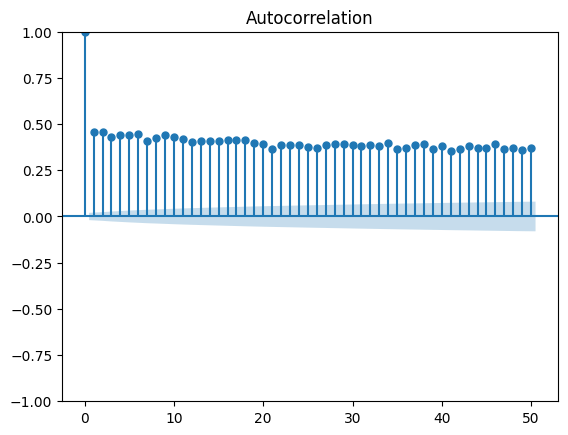

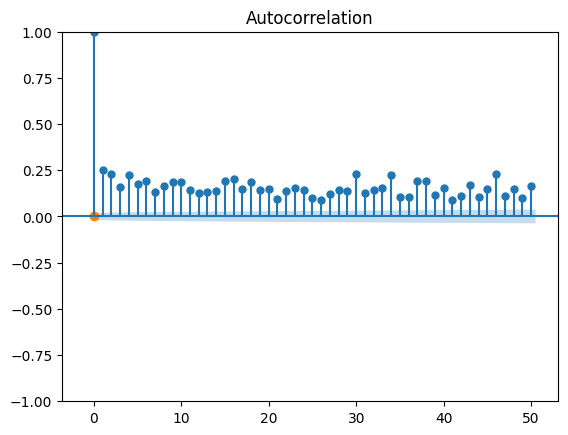

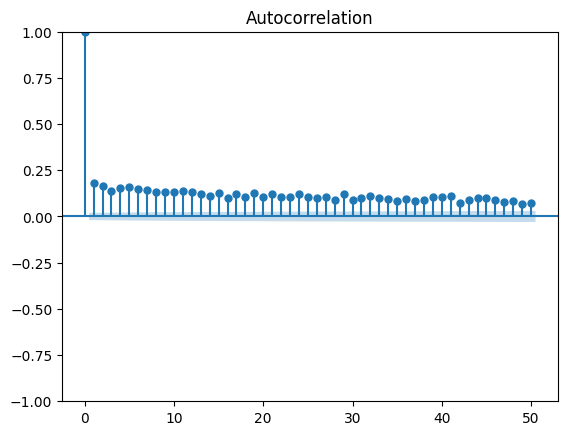

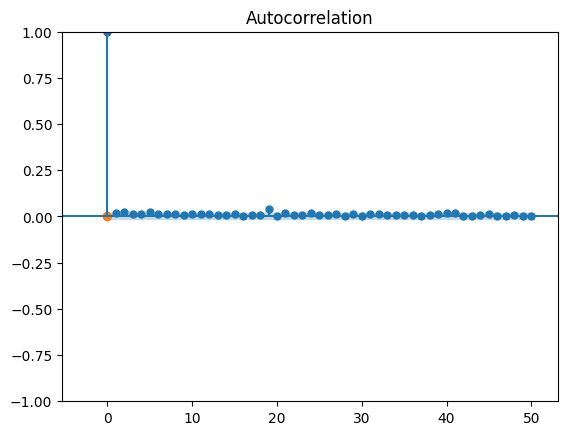

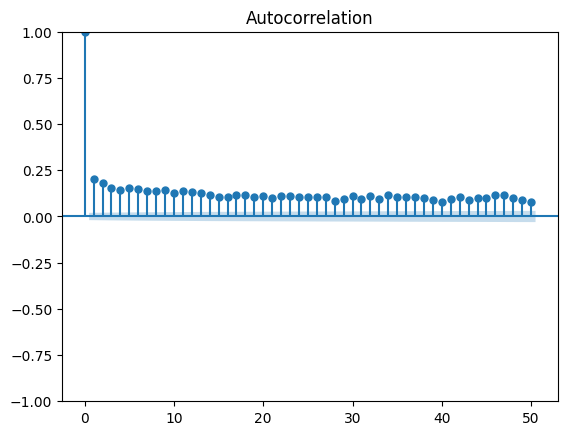

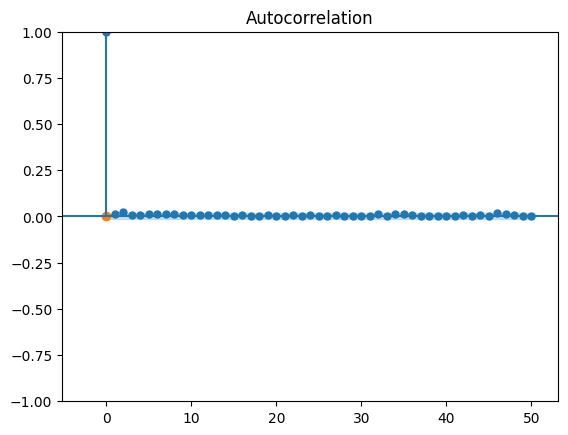

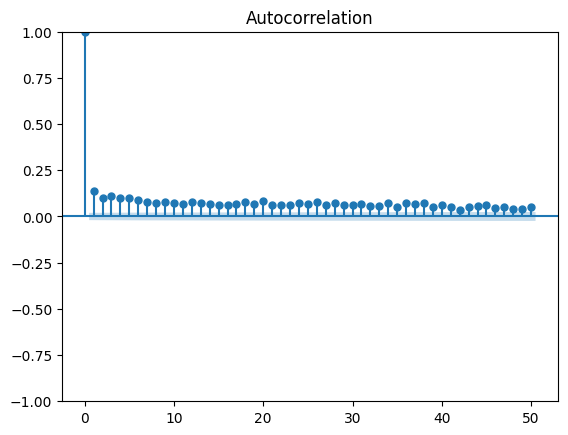

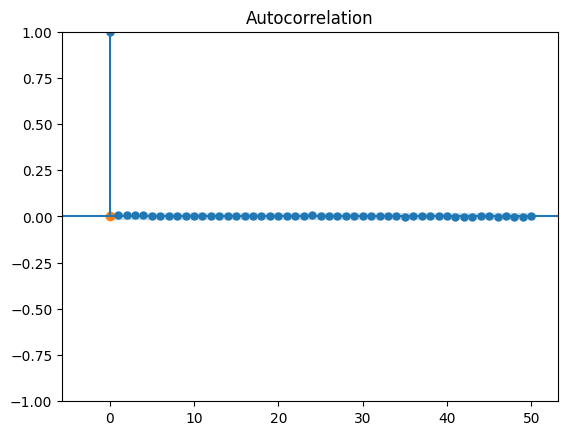

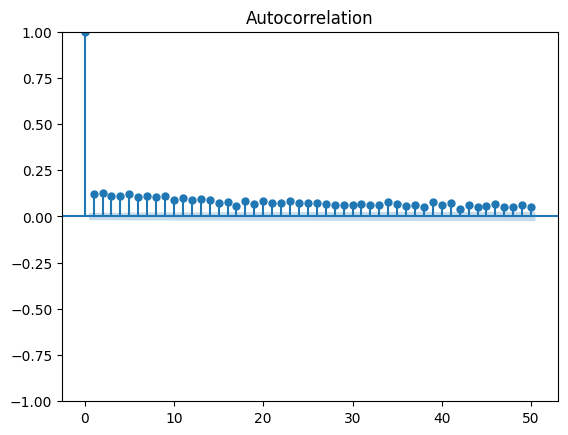

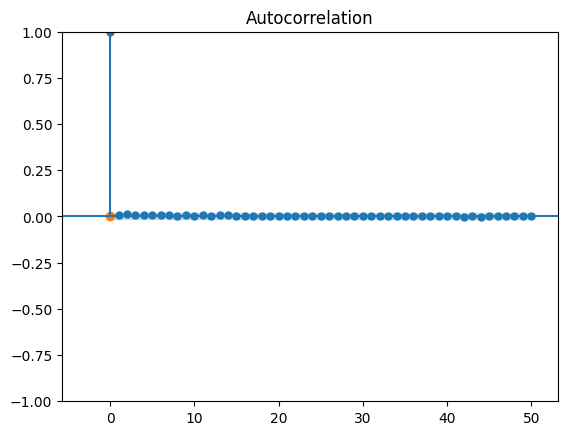

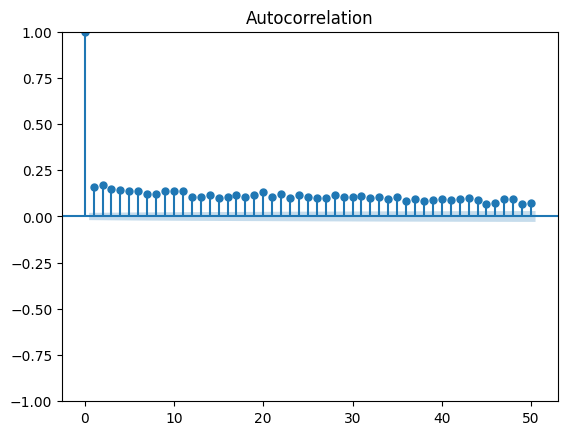

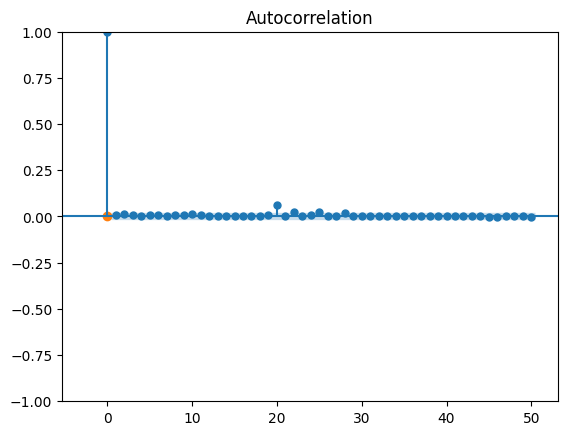

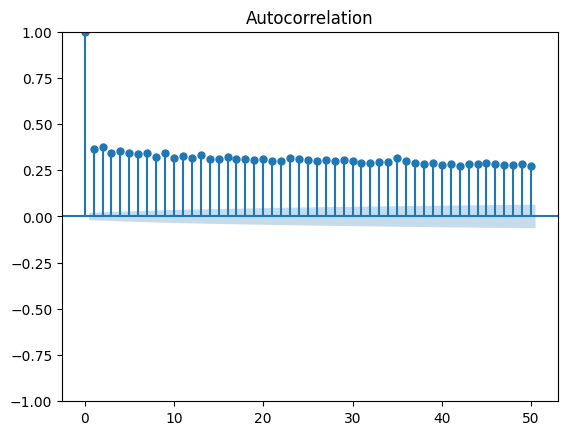

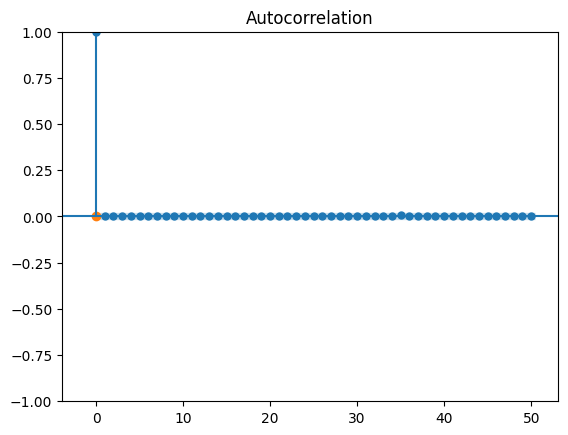

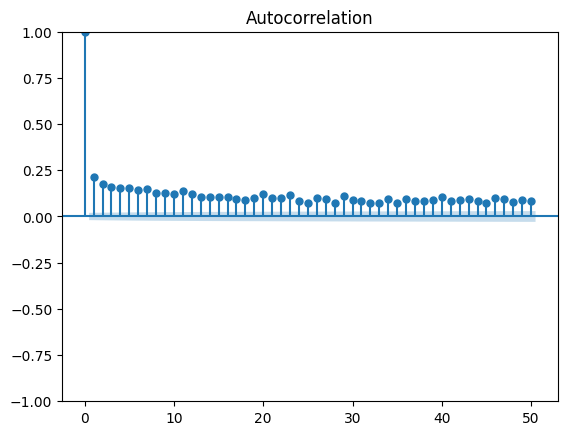

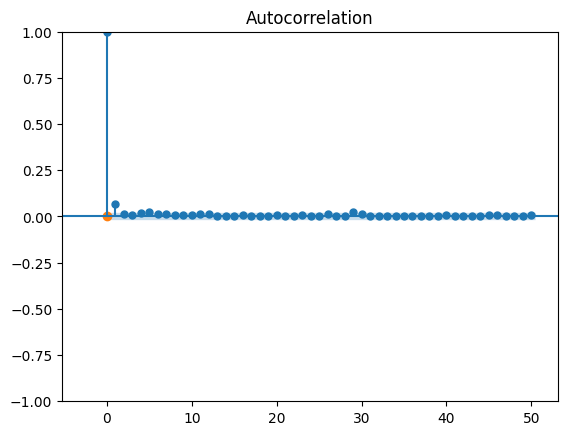

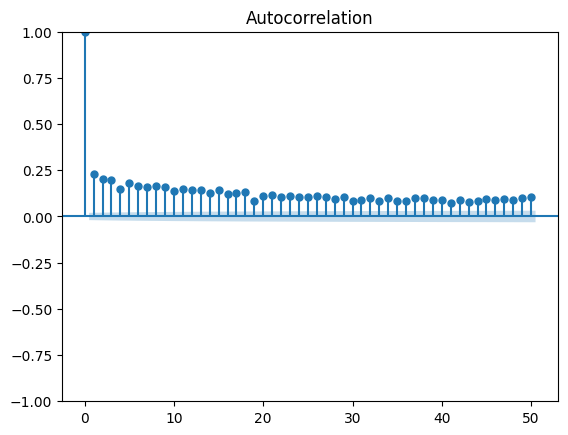

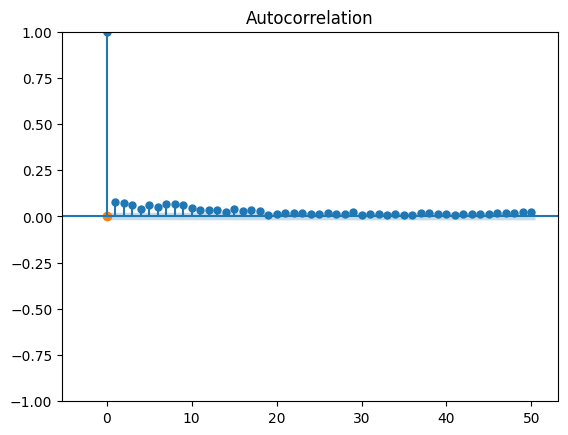

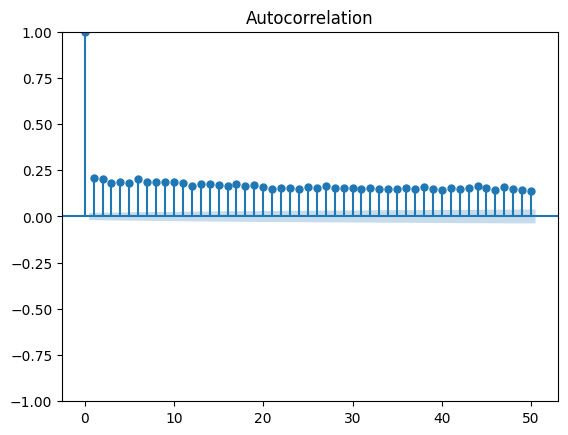

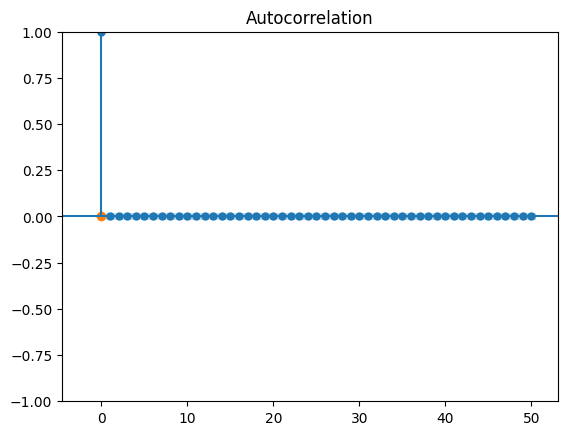

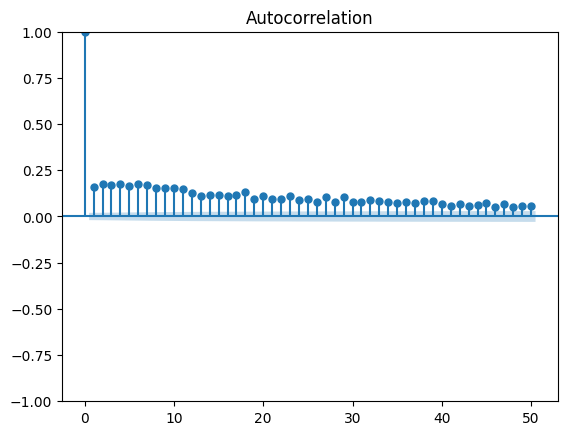

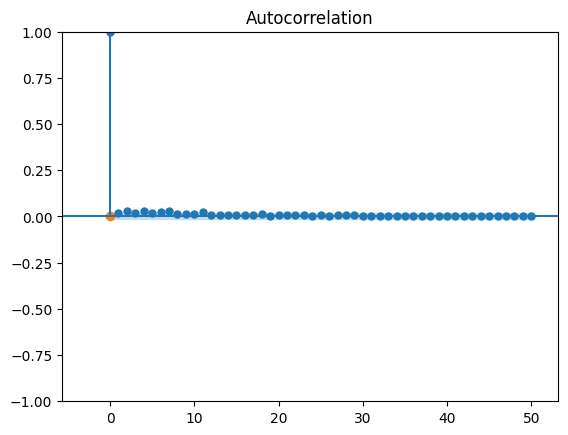

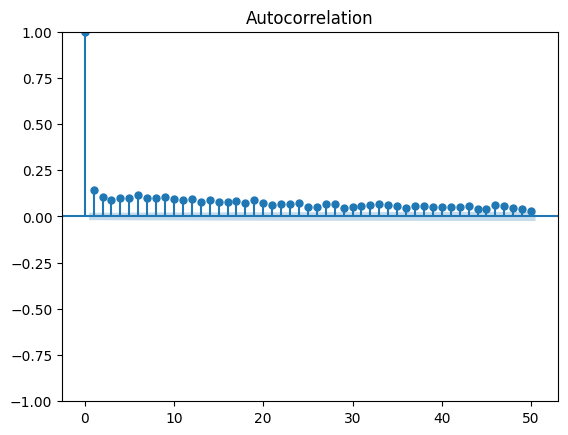

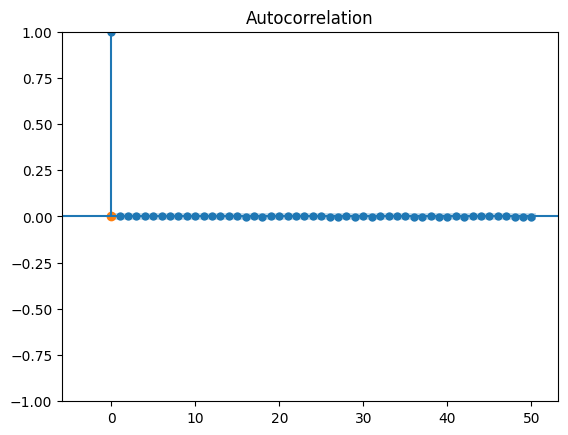

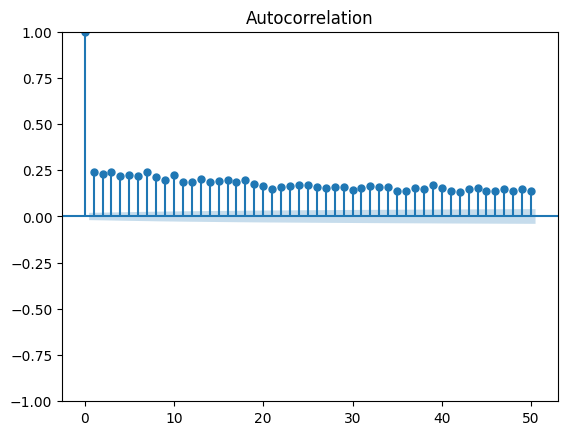

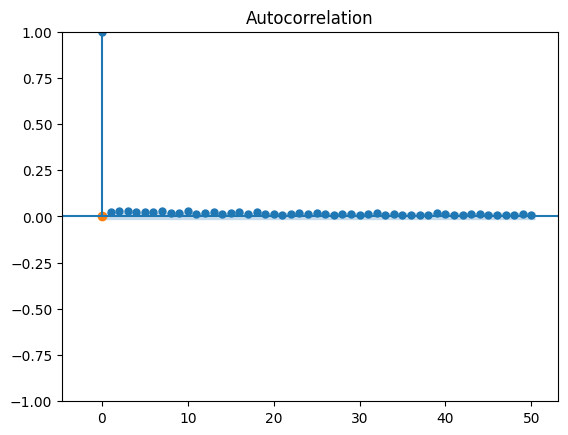

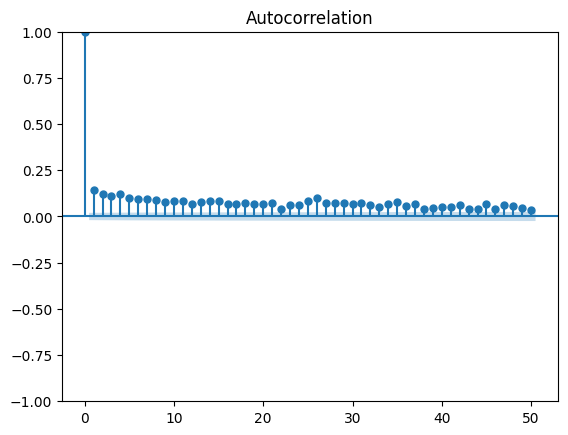

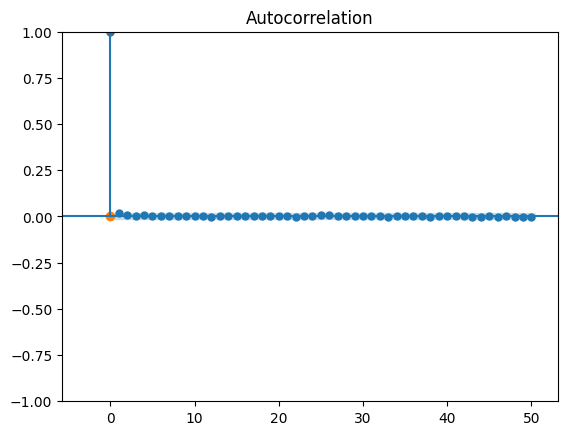

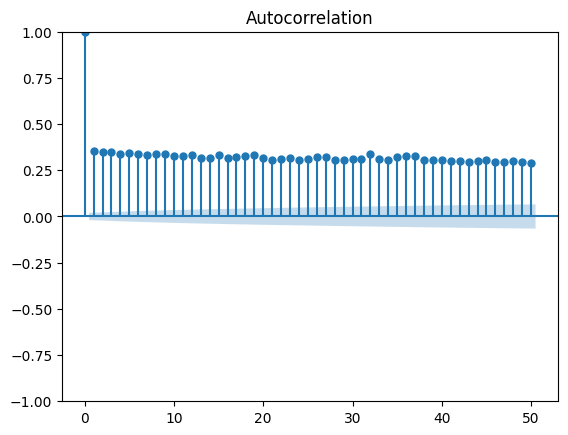

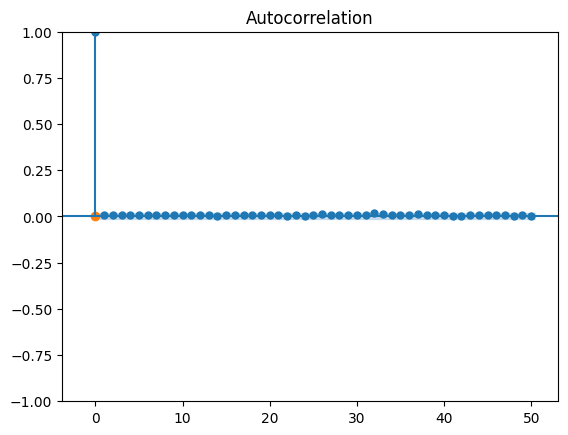

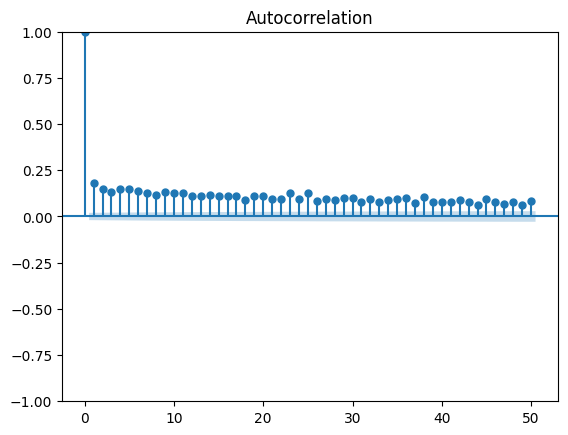

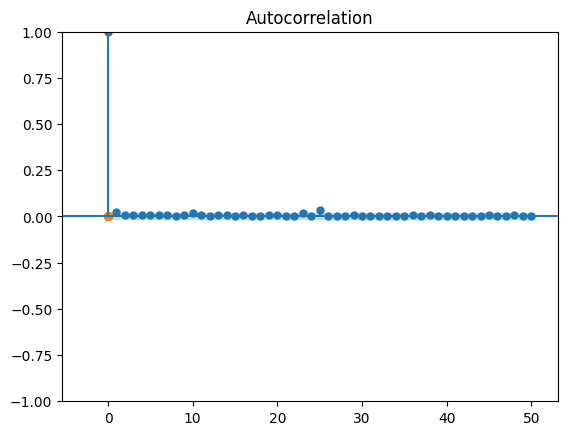

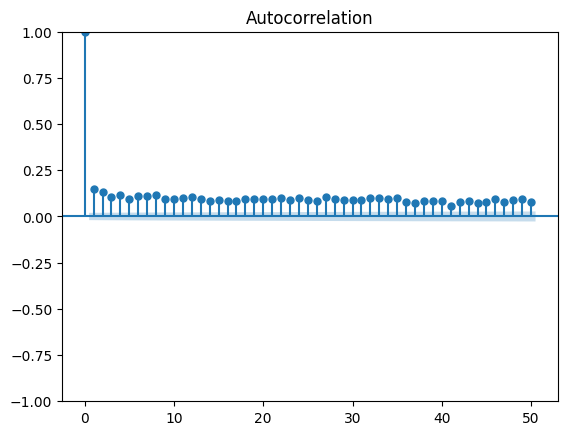

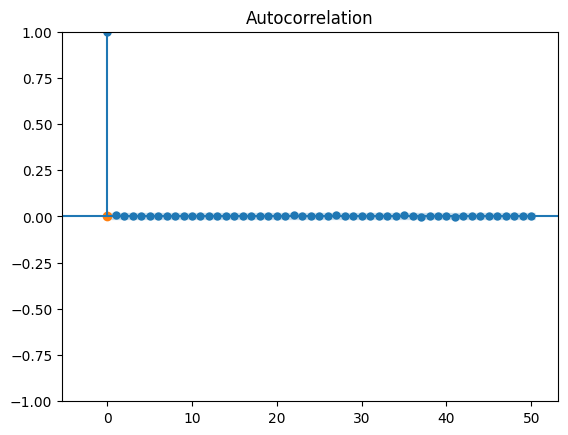

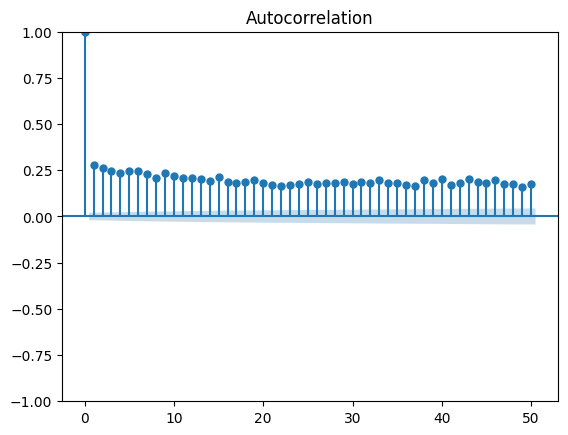

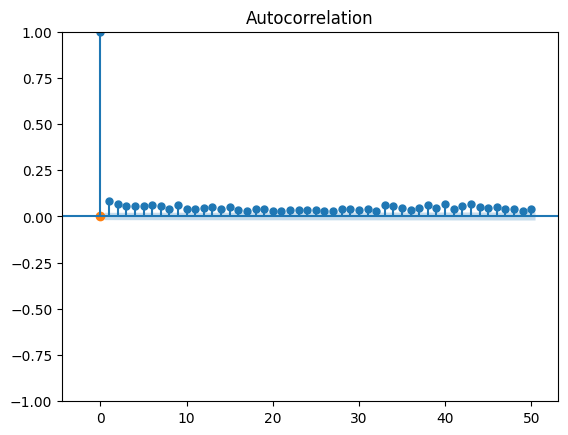

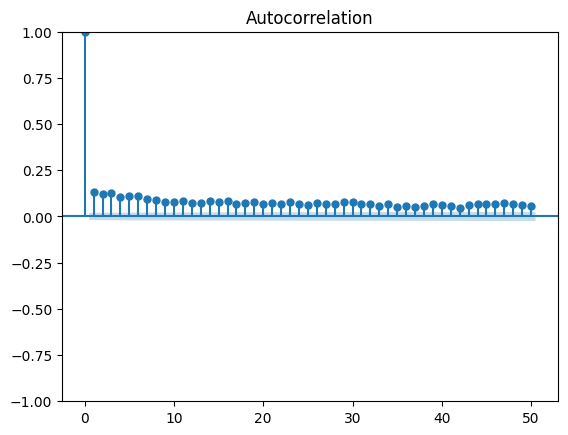

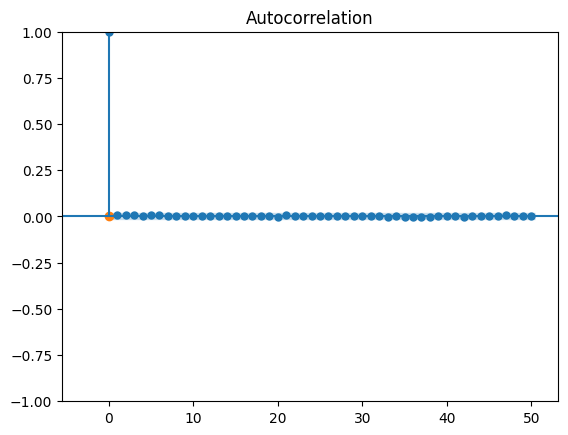

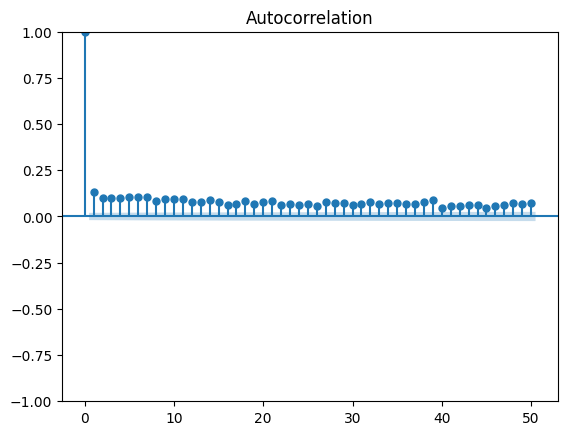

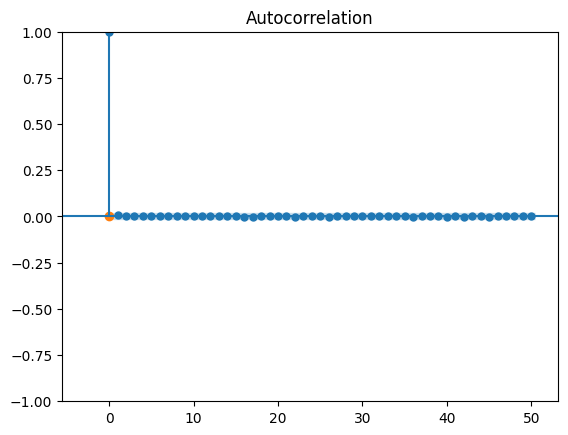

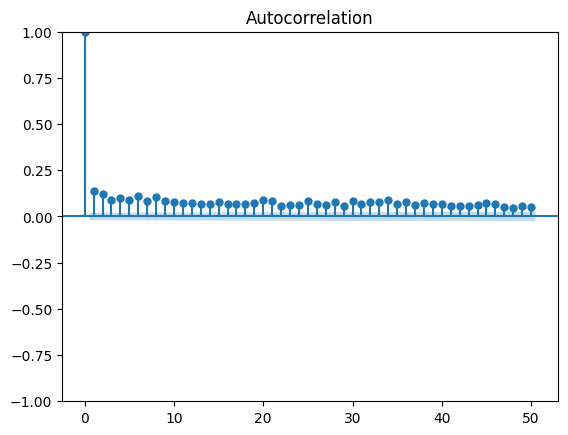

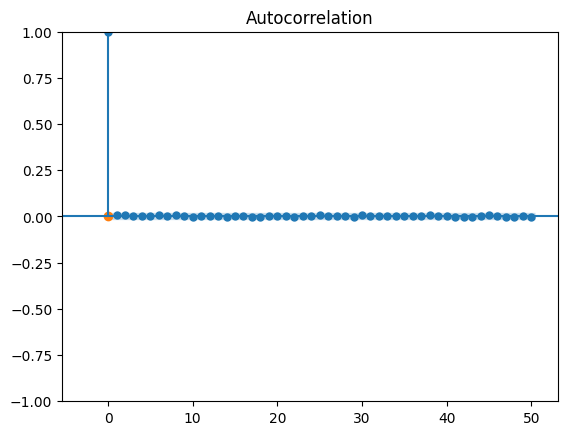

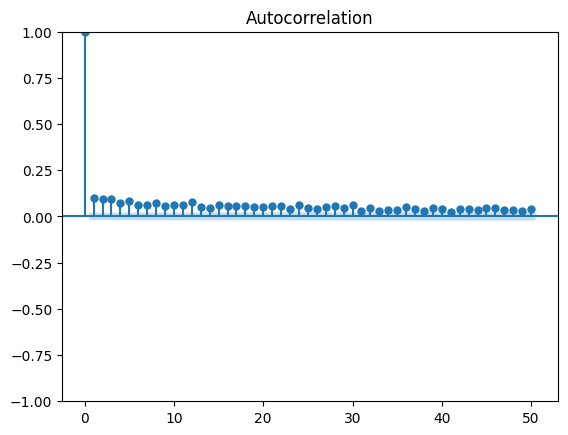

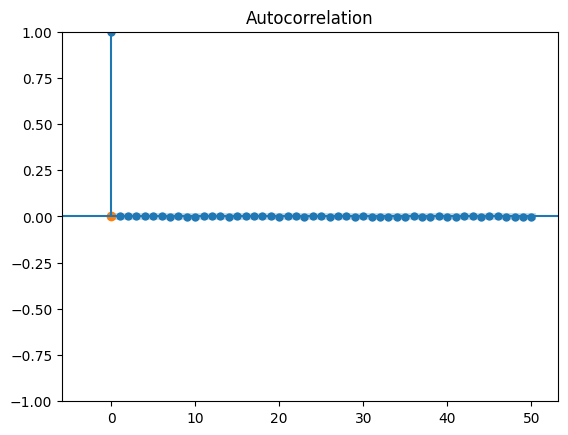

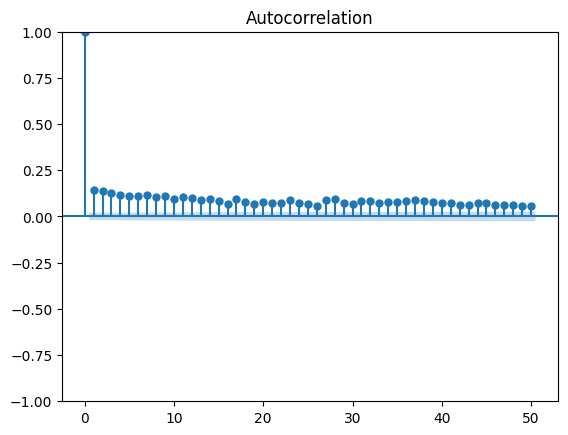

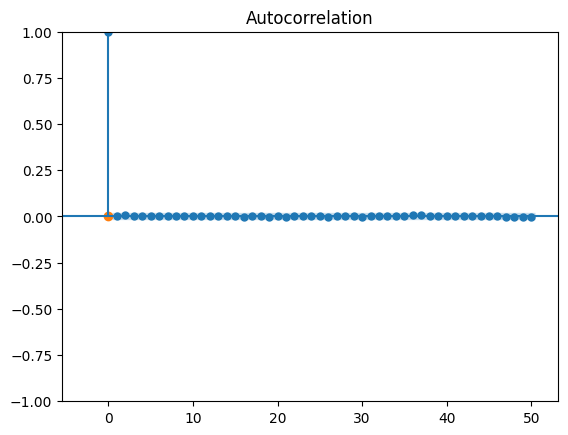

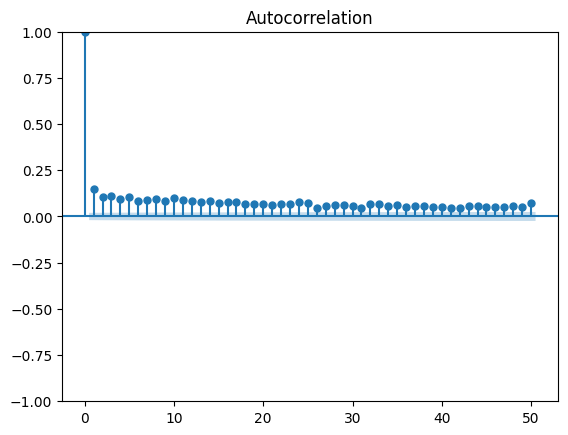

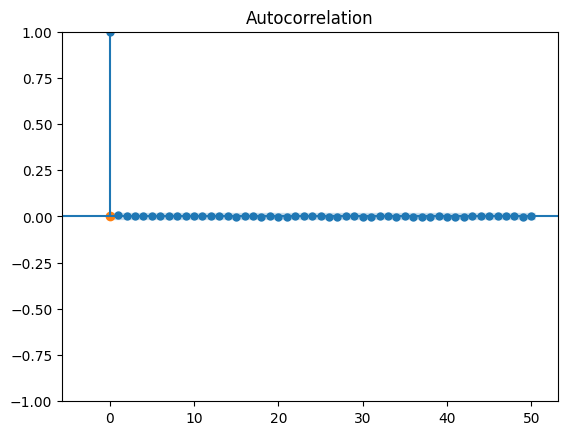

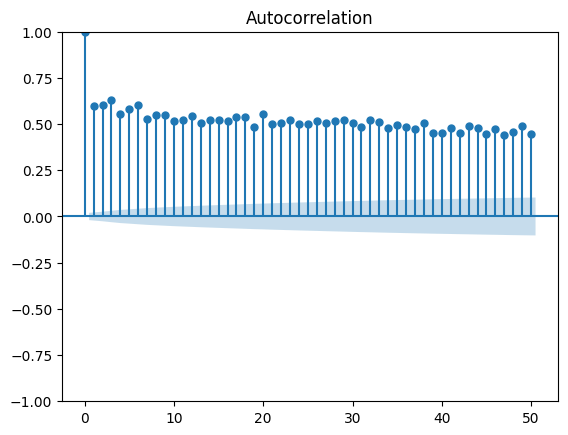

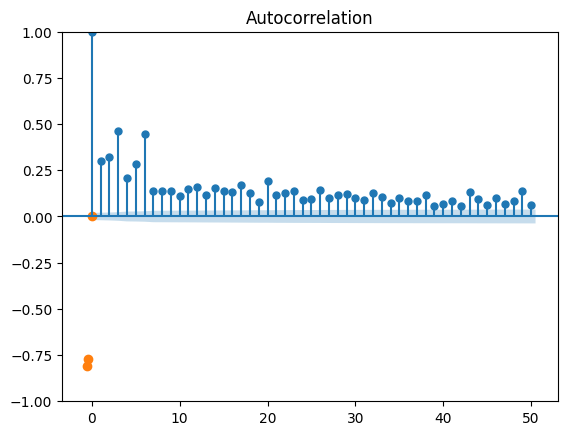

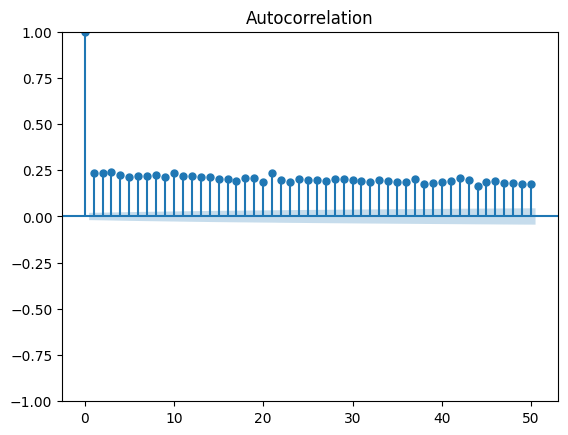

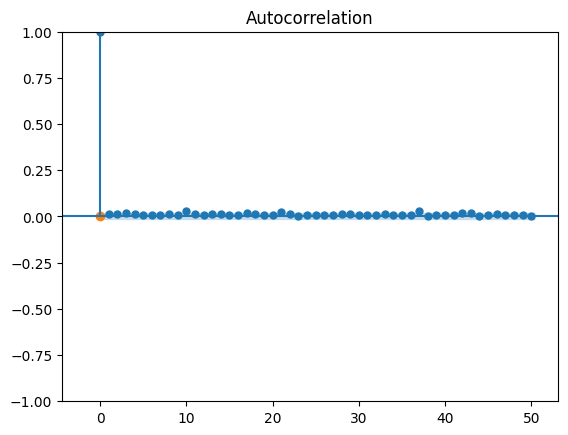

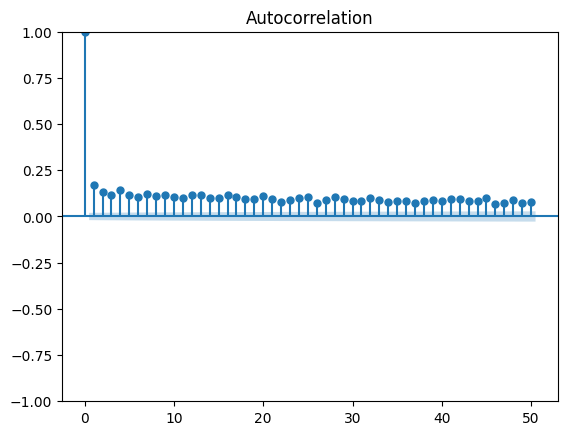

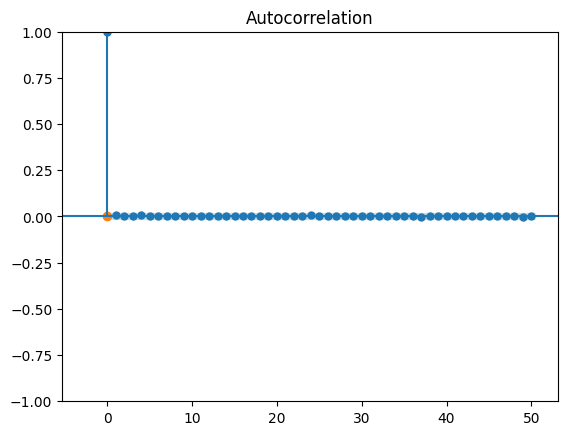

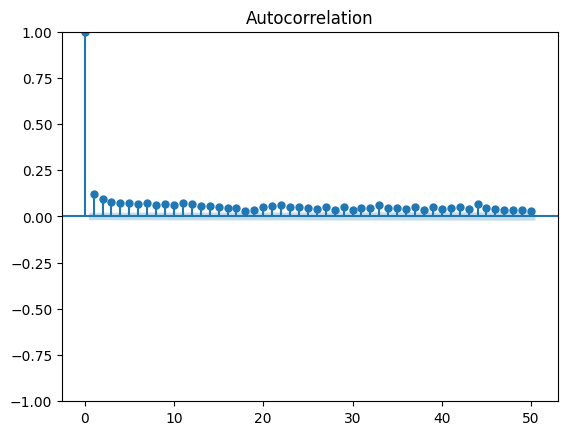

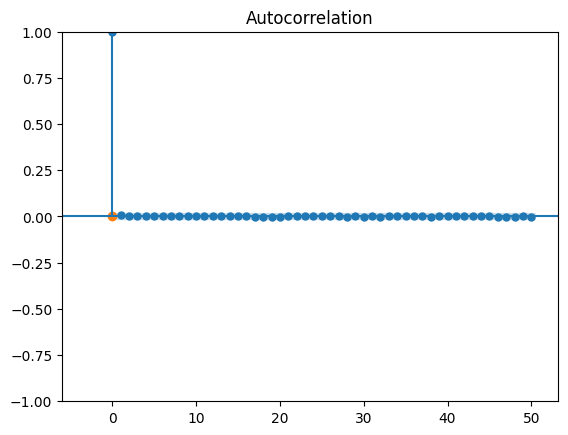

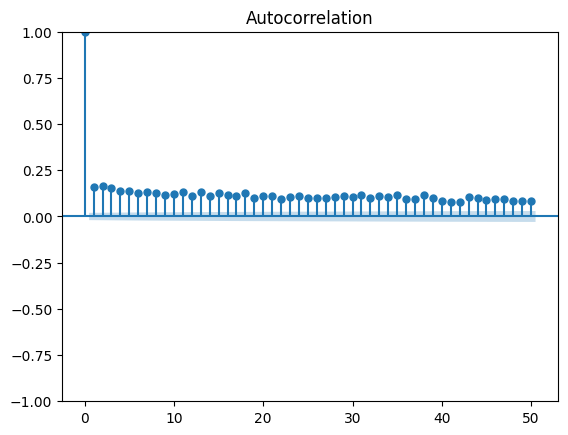

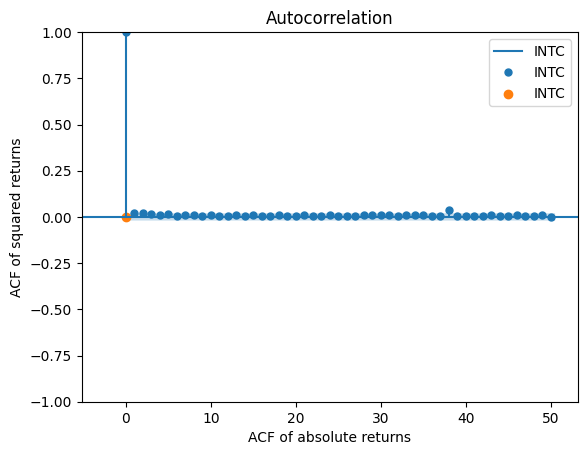

In [ ]:
# Plot the ACF v0.1
lags = 50
acf_abs_returns_per_stock = []
acf_squared_returns_per_stock = []
acf_abs_returns_per_stock_log = []
acf_squared_returns_per_stock_log = []
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    plot_acf(abs_returns, lags = lags, label = stock)
    plot_acf(squared_returns, lags = lags, label = stock)
    acf_abs_returns = acf(abs_returns, nlags = lags)
    acf_squared_returns = acf(squared_returns, nlags = lags)
    acf_abs_returns_log = np.log(acf_abs_returns)
    acf_squared_returns_log = np.log(acf_squared_returns)
    # plt.scatter(acf_abs_returns_log, acf_squared_returns_log, label = stock)
    acf_abs_returns_per_stock.append(acf_abs_returns)
    acf_squared_returns_per_stock.append(acf_squared_returns)
    acf_abs_returns_per_stock_log.append(acf_abs_returns_log)
    acf_squared_returns_per_stock_log.append(acf_squared_returns_log)
plt.legend()
plt.ylabel('ACF of squared returns')
plt.xlabel('ACF of absolute returns')
plt.show()

In [ ]:
acf_abs_returns_per_stock 
acf_squared_returns_per_stock 
acf_abs_returns_per_stock_log 
acf_squared_returns_per_stock_log

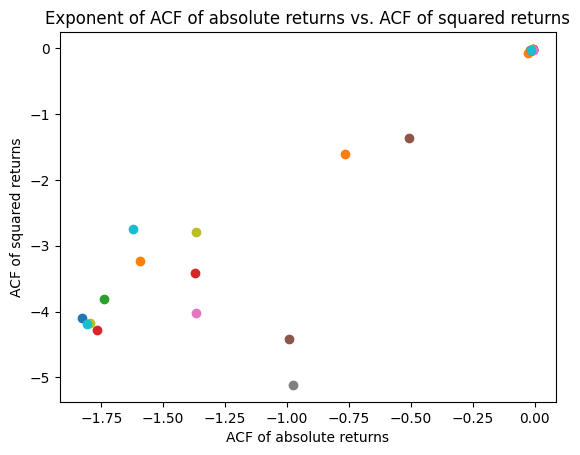

In [ ]:
plt.figure(figsize=(30,30))
for index in range(len(acf_abs_returns_per_stock_log)):
    # exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index]), acf_abs_returns_per_stock_log[index],1))
    # exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index]), acf_squared_returns_per_stock_log[index],1))

    exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index])), acf_abs_returns_per_stock_log[index],1)
    exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index])), acf_squared_returns_per_stock_log[index],1)
    plt.scatter(exponent_acf_abs_returns,exponent_acf_squared_returns, label = returns.columns[index])
    # scaling relationhip 1: gamma1 = gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1
    # scaling relationhip 2: gamma1 = 2*gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1*2
plt.plot(gamma1, gamma2, label = 'Scaling relationship 1: gamma1 = gamma2')
plt.plot(gamma1, 2*gamma2, label = 'Scaling relationship 1: gamma1 = 2*gamma2')
plt.legend()
plt.xlabel('Decay exponent gamma1: ACF of absolute returns')
plt.ylabel('Decay exponent gamma2: ACF of absolute returns')
plt.title('Power law decay Exponent of ACF of absolute returns vs. ACF of squared returns')
plt.show()


Feng et al's (2012) found scaling relationships (derived in appendix 3 of the paper) between power law decay exponents largely hold on a current dataset with CAT, V and AAPL being the outliers.

# Comparing S&P 500 total index closing ACF 

Since the complete 40 year data of S&P index closing prices was not avaiable, we take the last 10 years. The goal is to find out if the long term memory (ACF decay) is similair in both the emperical and simulated model data.

In [ ]:
total_SnP500_index_closing =pd.read_csv('data/df_total_SnP500_closing_10_years_clean.csv', parse_dates = True, index_col = 'Date')

In [ ]:
total_SnP500_index_closing

,Close/Last
Date,
2023-01-27,4070.56
2023-01-26,4060.43
2023-01-25,4016.22
2023-01-24,4016.95
2023-01-23,4019.81
...,...
2013-02-05,1511.29
2013-02-04,1495.71
2013-02-01,1513.17


In [ ]:
# make a log return series
returns = total_SnP500_index_closing.pct_change().dropna()

In [ ]:
# absolute returns
abs_returns = returns.abs()


In [ ]:
abs_returns

,Close/Last
Date,
2023-01-26,0.002489
2023-01-25,0.010888
2023-01-24,0.000182
2023-01-23,0.000712
2023-01-20,0.011742
...,...
2013-02-05,0.000549
2013-02-04,0.010309
2013-02-01,0.011673


In [ ]:
# squared returns
squared_returns =returns.apply(np.square)


In [ ]:
squared_returns

,Close/Last
Date,
2023-01-26,6.193135e-06
2023-01-25,1.185487e-04
2023-01-24,3.303777e-08
2023-01-23,5.069198e-07
2023-01-20,1.378710e-04
...,...
2013-02-05,3.012893e-07
2013-02-04,1.062770e-04
2013-02-01,1.362679e-04


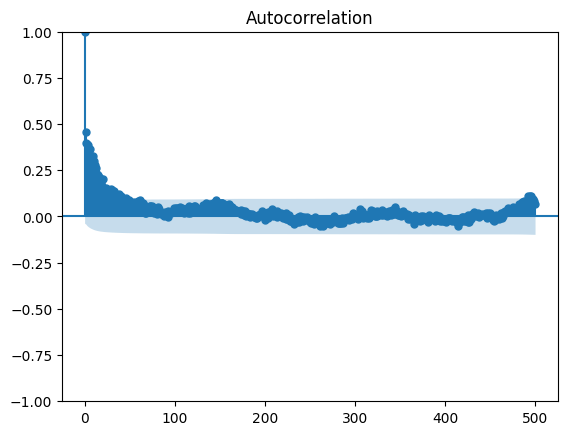

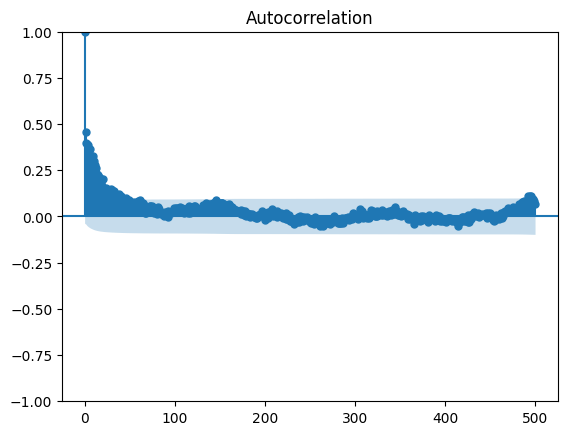

In [ ]:
plot_acf(abs_returns, lags = 500)

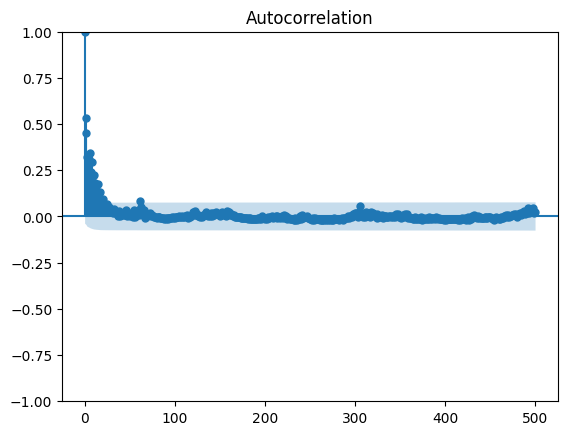

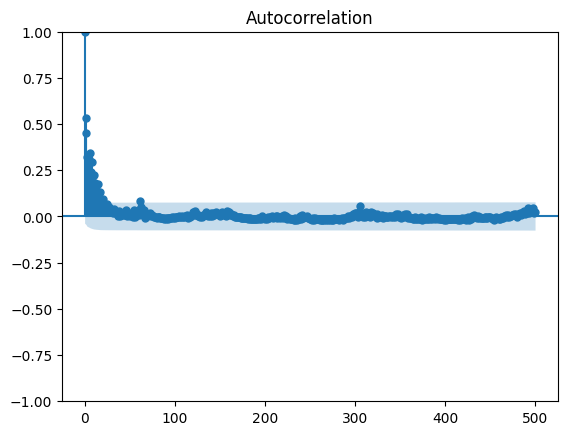

In [ ]:
plot_acf(squared_returns, lags = 500)

# Code below this is unfinished / not used yet

# Parameter tuning & further (sensitivity) analysis

In [ ]:
def r_squared(data, alpha, beta, x_range):
    """
    Goodness of fit test for regression
    """
    ss_res = []
    ss_total = []
    mean = np.mean(data)

    for i in range(x_range):
        prediction = alpha + beta * x_range[i]
        value = data[i]

        residual = (value - prediction) ** 2
        total = (value - mean) ** 2

        ss_res.append(residual)
        ss_total.append(total)

    return 1 - (ss_res / ss_total)


In [ ]:
iterations = 10

In [ ]:
# variances for return and volume for different k values
k_range = [i*0.5 for i in range(1, 51, 5)]

dict_return_variances_k = {'Range': k_range}
dict_volume_variances_k = {'Range': k_range}

for run in range(iterations):
    return_variances = []
    volume_variances = []


    for i in k_range:
        k = i
        k_test = Model(p, n, size, k, omega)
        for step in range(t):
            k_test.step()

        return_variance = np.var(k_test.daily_returns)
        volume_variance = np.var(k_test.daily_trading_volumes)
        volume_variances.append(volume_variance)
        return_variances.append(return_variance)

    dict_return_variances_k[f"Iteration {run}"] = return_variances
    dict_volume_variances_k[f"Iteration {run}"] = volume_variances

    print(run)

TypeError: __init__() missing 1 required positional argument: 'omega'

In [ ]:
df_return_variances_k = pd.DataFrame(dict_return_variances_k)
df_volume_variances_k = pd.DataFrame(dict_volume_variances_k)

df_return_variances_k.to_csv('data/return_variances_k.csv')
df_volume_variances_k.to_csv('data/volume_variances_k.csv')

In [ ]:
df_return_variances_k_transp = df_return_variances_k.transpose()
df_return_variances_k_transp.columns = k_range
df_return_variances_k_transp.drop("Range")

In [ ]:
df_volume_variances_k_transp = df_volume_variances_k.transpose()
df_volume_variances_k_transp.columns = k_range
df_volume_variances_k_transp.drop("Range")

In [ ]:
k_return_variances_mean = np.array(df_return_variances_k_transp.mean())
k_volume_variances_mean = np.array(df_volume_variances_k_transp.mean())
k_return_variances_sd = np.array(df_return_variances_k_transp.std())
k_volume_variances_sd = np.array(df_volume_variances_k_transp.std())

In [ ]:
# plot variances for return distributions for different k values
plt.scatter(k_range, k_return_variances_mean)
plt.errorbar(k_range, k_return_variances_mean, yerr=k_return_variances_sd, fmt='o')
plt.show()

In [ ]:
# plot variances for volume distributions for different k values
plt.scatter(k_range, k_volume_variances_mean)
plt.errorbar(k_range, k_volume_variances_mean, yerr=k_volume_variances_sd, fmt='o')
plt.show()

In [ ]:
# linear regression for return variances
k_array = np.array(k_range).reshape((-1, 1))
k_return_regression = LinearRegression().fit(k_array, k_return_variances_mean)
k_return_r2 = r_squared(k_return_variances_mean, k_return_regression.intercept_, k_return_regression.coef_, k_range)

In [ ]:
# plot linear regression for return variances
plt.scatter(k_range, k_return_variances_mean)
plt.plot(k_range, k_return_regression.intercept_ + k_return_regression.coef_ * k_array, 'r')
plt.show()

In [ ]:
# linear regression for volume variances
k_volume_regression = LinearRegression().fit(k_array, k_volume_variances_mean)
k_volume_r2 = r_squared(k_volume_variances_mean, k_volume_regression.intercept_, k_volume_regression.coef_, k_range)

In [ ]:
# plot linear regression for volume variances
plt.scatter(k_range, k_volume_variances_mean)
plt.plot(k_range, k_volume_regression.intercept_ + k_volume_regression.coef_ * k_array, 'r')
plt.show()

In [ ]:
# R^2 for k regressions
print("R^2 for return variances: ", k_return_r2)
print("R^2 for volume variances: ", k_volume_r2)

In [ ]:
# omega values for return and volume for different k values
omega_range = [i*0.1 for i in range(1, 51)]
omega_return_dict = {'Range': omega_range}
omega_volume_dict = {'Range': omega_range}

for run in range(iterations):
    return_variances = []
    volume_variances = []

    for i in omega_range:
        omega = i
        omega_test = Model(p, n, size, k, i)
        for step in range(t):
            omega_test.step()

        return_variance = np.var(omega_test.daily_returns)
        volume_variance = np.var(omega_test.daily_trading_volumes)
        volume_variances.append(volume_variance)
        return_variances.append(return_variance)

    omega_return_dict[f"Iteration {run}"] = return_variances
    omega_volume_dict[f"Iteration {run}"] = volume_variances

In [ ]:
df_omega_return_variances = pd.DataFrame(omega_return_dict)
df_omega_volume_variances = pd.DataFrame(omega_volume_dict)
df_omega_return_variances.to_csv('data/return_variances_omega.csv')
df_omega_volume_variances.to_csv('data/volume_variances_omega.csv')

In [ ]:
df_omega_return_variances_transp = df_omega_return_variances.transpose()
df_omega_return_variances_transp.columns = omega_range
df_omega_return_variances_transp.drop("Range")

In [ ]:
df_omega_volume_variances_transp = df_omega_volume_variances.transpose()
df_omega_volume_variances_transp.columns = omega_range
df_omega_volume_variances_transp.drop("Range")

In [ ]:
omega_return_means = np.array(df_omega_return_variances_transp.mean())
omega_volume_means = np.array(df_omega_volume_variances_transp.mean())

omega_return_sd = np.array(df_omega_return_variances_transp.std())
omega_volume_sd = np.array(df_omega_volume_variances_transp.std())

In [ ]:
# Regression of return variances for different omega values
omega_array = np.array(omega_range).reshape((-1, 1))
omega_return_regression = LinearRegression().fit(omega_array, omega_return_means)
omega_return_r2 = r_squared(omega_return_means, omega_return_regression.intercept_, omega_return_regression.coef_, omega_range)

In [ ]:
# Plot regression of return variances for different omega values
plt.scatter(omega_range, omega_return_means)
plt.plot(omega_range, omega_return_regression.intercept_ + omega_return_regression.coef_ * omega_array, 'r')
plt.show()

In [ ]:
# Regression of volume variances for different omega values
omega_volume_regression = LinearRegression().fit(omega_array, omega_volume_means)
omega_volume_r2 = r_squared(omega_volume_means, omega_volume_regression.intercept_, omega_volume_regression.coef_, omega_range)

In [ ]:
# Plot regression of volume variances for different omega values
plt.scatter(omega_range, omega_volume_means)
plt.plot(omega_range, omega_volume_regression.intercept_ + omega_volume_regression.coef_ * omega_array, 'r')
plt.show()

In [ ]:
# R^2 of omega regressions
print(f"R^2 of return variance regression for omega: {omega_return_r2}")
print(f"R^2 of volume variance regression for omega: {omega_volume_r2}")

In [ ]:
# p_test - return and volume variances
p_range = [i*0.1 for i in range(1, 6)]

dict_return_variances_p = {'Range': p_range}
dict_volume_variances_p = {'Range': p_range}

for run in range(iterations):
    returns = []
    volumes = []

    for i in p_range:
        p = i
        p_test = Model(p, n, size, k, omega)
        
        for step in range(100):
            p_test.step()

        return_variance = np.var(p_test.daily_returns)
        volume_variance = np.var(p_test.daily_trading_volumes)
        returns.append(return_variance)
        volumes.append(volume_variance)

    dict_return_variances_p[f"Iteration {run}"] = returns
    dict_volume_variances_p[f"Iteration {run}"] = volumes

print(run)


In [ ]:
df_return_variances_p = pd.DataFrame(dict_return_variances_p)
df_volume_variances_p = pd.DataFrame(dict_volume_variances_p)

df_return_variances_p.to_csv('data/return_variances_p.csv')
df_volume_variances_p.to_csv('data/volume_variances_p.csv')

In [ ]:
df_return_variances_p_transp = df_return_variances_p.transpose()
df_return_variances_p_transp.columns = p_range
df_return_variances_p_transp.drop('Range')

In [ ]:
df_volume_variances_p_transp = df_volume_variances_p.transpose()
df_volume_variances_p_transp.columns = p_range
df_volume_variances_p_transp.drop('Range')

In [ ]:
p_return_means = np.array(df_return_variances_p_transp.mean())
p_return_sd = np.array(df_return_variances_p_transp.std())

p_volume_means = np.array(df_volume_variances_p_transp.mean())
p_volume_sd = np.array(df_volume_variances_p_transp.std())


In [ ]:
# Returns for different values of p
plt.scatter(p_range, p_return_means)
plt.errorbar(p_range, p_return_means, yerr=p_return_sd)
plt.show()

In [ ]:
# Volumes for different values of p
plt.scatter(p_range, p_volume_means)
plt.errorbar(p_range, p_volume_means, yerr=p_volume_sd)
plt.show()

In [ ]:
p_array = np.array(p_range).reshape((-1, 1))

p_return_variances_r = LinearRegression().fit(p_array, p_return_means)
p_volume_variances_r = LinearRegression().fit(p_array, p_volume_means)

p_test_return_variances = r_squared(p_return_means, p_return_variances_r.intercept_, p_return_variances_r.coef_, p_range)
p_test_volume_variances = r_squared(p_volume_means, p_volume_variances_r.intercept_, p_volume_variances_r.coef_, p_range)

In [ ]:
# return regression
plt.plot(p_range, p_return_variances_r.intercept_ + p_return_variances_r.coef_ * p_array)
plt.scatter(p_range, p_return_means)
plt.show()

In [ ]:
# volume regression
plt.plot(p_range, p_volume_variances_r.intercept_ + p_volume_variances_r.coef_ * p_array)
plt.scatter(p_range, p_volume_means)
plt.show()

In [ ]:
print("R^2 for the return variance regression:", p_test_return_variances)
print("R^2 for the volume variance regression:", p_test_volume_variances)

In [ ]:
# m_test - return and volume variances
m_range = [i for i in range(1, 500)]
m_dict = {'Range': m_range}

for run in range(iterations):
    returns = []
    volumes = []

    for i in m_range:
        m = i
        m_test = Stochastic_Model(n, p, init, True, i, d)
        
        for step in range(100):
            m_test.step()

        return_variance = np.var(m_test.returns)
        returns.append(return_variance)

    m_dict[f"Iteration {run}"] = returns


In [ ]:
df_return_variances_m = pd.DataFrame(m_dict)
df_return_variances_m.to_csv('data/return_variances_m.csv')


In [ ]:
df_return_variances_m_transp = df_return_variances_m.transpose()
df_return_variances_m_transp.columns = m_range
df_return_variances_m_transp.drop('Range')

In [ ]:
m_return_means = np.array(df_return_variances_m_transp.mean())
m_return_sd = np.array(df_return_variances_m_transp.std())

In [ ]:
# Linear regression for return variances
m_array = np.array(m_range).reshape((-1, 1))

m_return_variances_r = LinearRegression().fit(m_array, m_return_means)
m_return_variances_test = r_squared(m_return_means, m_return_variances_r.intercept_, m_return_variances_r.coef_, m_range)


In [ ]:
plt.plot(m_range, m_return_variances_r.intercept_ + m_return_variances_r.coef_ * m_array)
plt.scatter(m_range, m_return_means)
plt.show()

In [ ]:
print("R^2 for the return variance regression:", m_return_variances_test)

In [ ]:
# d_test - return and volume variances
d_range = [i*0.1 for i in range(1, 21)]
d_dict = {'Range': d_range}

for run in range(iterations):
    return_variances = []

    for i in d_range:
        d = i
        d_test = Stochastic_Model(n, p, init, True, M, i)
        
        for step in range(100):
            d_test.step()

        return_variance = np.var(d_test.returns)
        return_variances.append(return_variance)

    d_dict[f"Iteration {run}"] = return_variances
    
    print(run)

In [ ]:
df_return_variances_d = pd.DataFrame(d_dict)
df_return_variances_d.to_csv('data/return_variances_d.csv')

In [ ]:
df_return_variances_d_transp = df_return_variances_d.transpose()
df_return_variances_d_transp.columns = d_range
df_return_variances_d_transp.drop('Range')

In [ ]:
# Mean and sd for return variances
d_return_means = np.array(df_return_variances_d_transp.mean())
d_return_sd = np.array(df_return_variances_d_transp.std())

In [ ]:
plt.scatter(d_range, d_return_means)
plt.errorbar(d_range, d_return_means, yerr=d_return_sd)
plt.show()

In [ ]:
# Linear regression for return variances for different values of d
d_array = np.array(d_range).reshape((-1, 1))
d_return_r = LinearRegression().fit(d_array, d_return_means)
d_return_test = r_squared(d_return_means, d_return_r.intercept_, d_return_r.coef_, d_range)

In [ ]:
plt.plot(d_range, d_return_r.intercept_ + d_return_r.coef_ * d_array)
plt.scatter(d_range, d_return_means)
plt.show()

In [ ]:
# R^2 for d regression
print("R^2 for the return variance regression:", d_return_test)

In [ ]:
# Example of parameter generation
parameters = np.arange(0, 10, 1)
print("parameters to test:", parameters)


def gridsearch(real, abm_or_stoch, parameters):
    best_param = 0
    best_loss = 1000000000
    for param in parameters:
        if abm_or_stoch == 'abm':
            model_test = Model(p, n, size, k, omega) # change the parameter to test to "param"
            for i in range(t):
                model_test.step()
            abs_returns = [abs(day) for day in model_test.daily_returns]
            result = np.array(abs_returns)
        else:
            stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
            stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)
            for i in range(t):
                stochastic.step()
                stochastic_horizons.step()
            abs_returns = [abs(i) for i in stochastic.returns]
            result = np.array(abs_returns)
        rmse = np.sqrt(mean_squared_error(real, result))
        if rmse < best_loss:
            best_param = current_param
            best_loss = rmse
    return best_param, best_loss

# Implementation from https://archive.lib.msu.edu/crcmath/math/math/l/l142.html
def exp_lsq(x, y):
    n = len(bin) # sample size?
    ln_y = np.log(y, where= y != 0)
    sum_ln_y = np.sum(ln_y)
    sum_x = np.sum(x)
    sum_x_ln_y = np.sum(x * ln_y)
    print('sum_ln_y', sum_ln_y, 'sum_x', sum_x)
    a = (sum_ln_y * sum_x**2 - sum_x*sum_x_ln_y) / (n * np.sum(x**2) - sum_x**2)
    b = (n * sum_x_ln_y - sum_x*sum_ln_y)/(n * np.sum(x**2) - sum_x**2)
    return a, b

In [ ]:
a, b = exp_lsq(bin, real_bins)
print(a,b)
x = np.arange(0, len(bin), 1)
y = np.exp(a)*math.e**(b*x)
plt.scatter(x,y)

NameError: name 'exp_lsq' is not defined